<a href="https://colab.research.google.com/github/HairuoGao029/MasterThesis/blob/main/result_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%tensorflow_version 1.x
#!pip install tensorflow-gpu==1.15.2

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MSc/dcrnn

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MSc/dcrnn


In [ ]:
!nvidia-smi

Fri Sep 30 09:00:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu==1.15.2
!python run_demo.py --config_filename=/content/drive/MyDrive/MSc/dcrnn/data/model/dcrnn_DR_2_h_12_64-64_lr_0.1_bs_64_0715084034/config_23.yaml


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/ops.py", line 2380, in get_attr
    c_api.TF_OperationGetAttrValueProto(self._c_op, name, buf)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Operation 'Train/DCRNN/DCRNN_SEQ/rnn_decoder/rnn_decoder/multi_rnn_cell/cell_0_9/dcgru_cell/gates/gates/SparseTensorDenseMatMul_1/SparseTensorDenseMatMul' has no attr named '_XlaCompile'.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/ops/gradients_util.py", line 345, in _MaybeCompile
    xla_compile = op.get_attr("_XlaCompile")
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/ops.py", line 2384, in get_attr
    raise ValueError(str(e))
ValueError: Operation 'Train/DCRN

In [ ]:
# number of users
#rawdata = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_FE_70.npy', allow_pickle=True).item()
rawdata = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_M_beginning_30.npy', allow_pickle=True).item()
#id = ['56250003#0_0%1', '237111029#1.254_0%1', '238459506.6_0%1', '62830645#2.0.0_0%1']
id = ['238459506.6_0%1', '62830645#2.0.0_0%1']
#lane_id = id[0]
all1 = 0
all = 0
att1 = 0
att = 0
for lane_id in id:
  print(lane_id)
  for i in range(6):
    all1 = len(rawdata[lane_id]['Original'][i])
    all += all1
    att1 = len(rawdata[lane_id]['Attacker'][i])
    att += att1
  print(all-att)
  print(att)
  print(all/att)

238459506.6_0%1
11
11
2.0
62830645#2.0.0_0%1
28
28
2.0


In [ ]:
# FE
exp = '30'
rawdata = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_FE_'+exp+'.npy', allow_pickle=True).item()
#result1 = np.load('/content/drive/MyDrive/MSc/dcrnn/data/dcrnn_predictions.npz', allow_pickle=True)
result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/original.npz', allow_pickle=True)
a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_'+exp+'.npy', allow_pickle=True)
b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)
lane_list = np.load('/content/drive/MyDrive/MSc/net/lane_list.npy', allow_pickle=True)
id = ['56250003#0_0%1', '237111029#1.254_0%1', '238459506.6_0%1', '62830645#2.0.0_0%1']
time = [1800, 2040, 2760, 2850, 2520, 2640, 2760]

In [ ]:
print(len(result1['predictions'][1,:,98]))

270


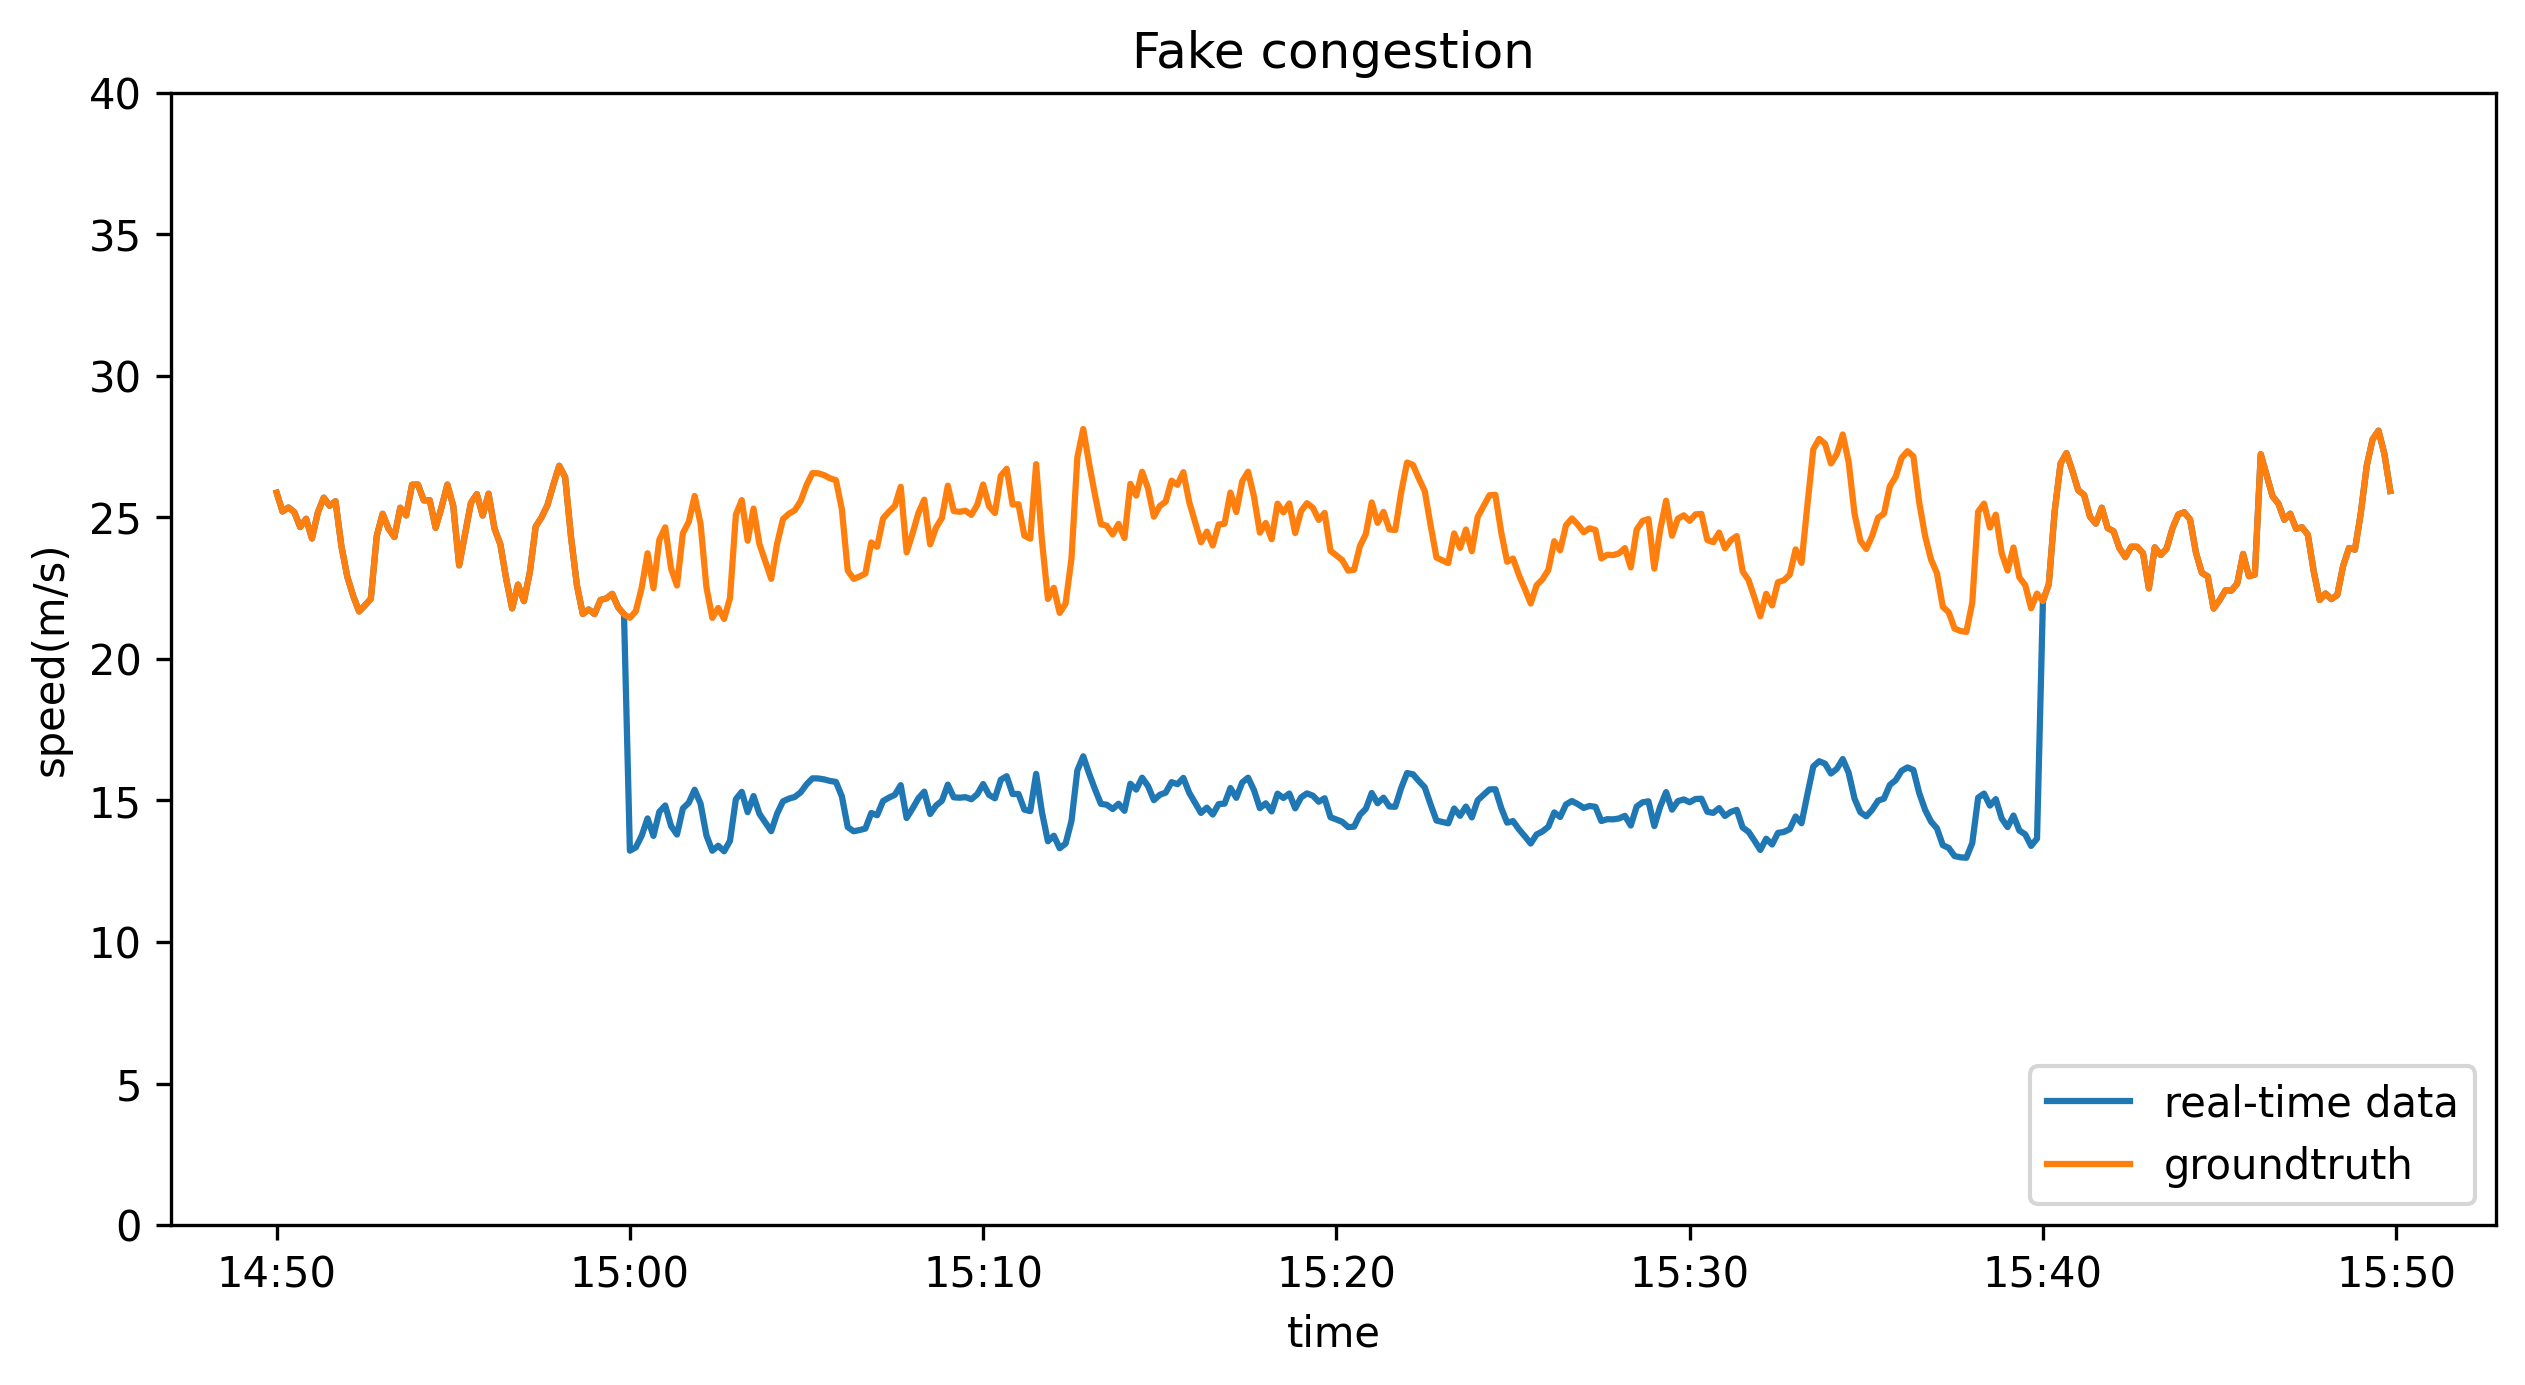

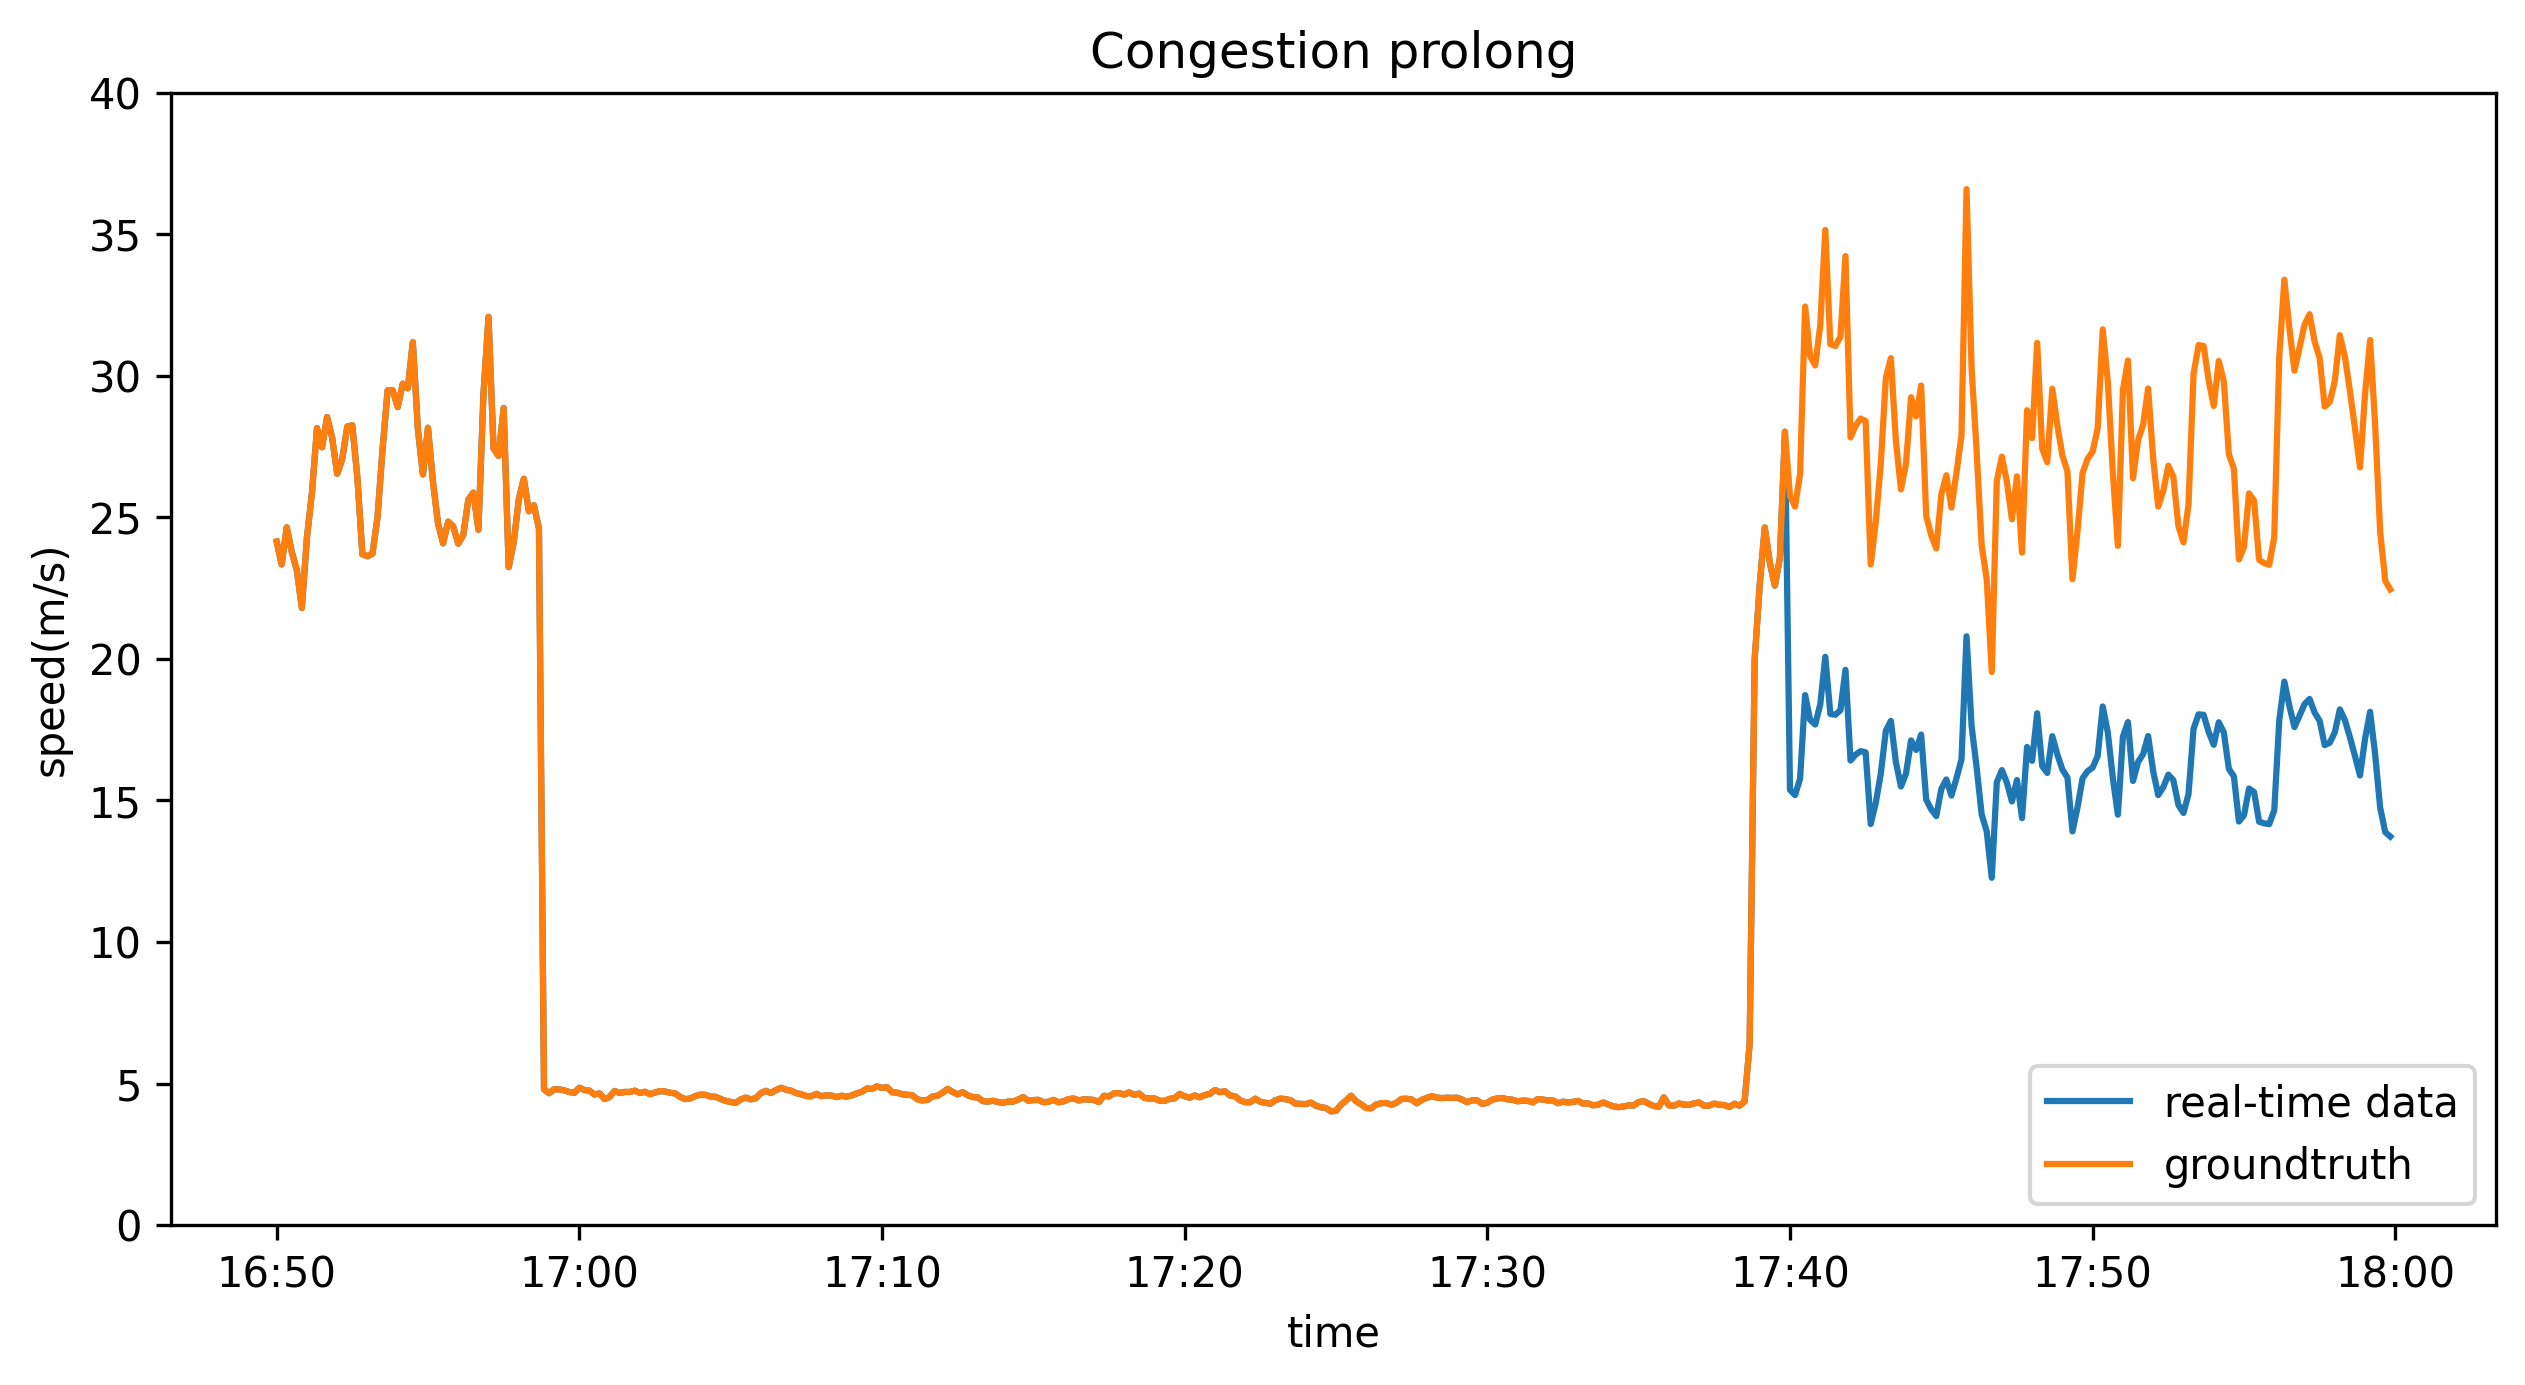

In [ ]:
import matplotlib.pyplot as plt

#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_50.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_50.npy', allow_pickle=True)
#b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

non = [None]*30

xs1 = []  #自定义的横坐标
for i in ['14:40','14:50','15:00','15:10','15:20','15:30','15:40','15:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
xs2 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50','18:00','18:10']:
    xs2.append(i)
scale2 = np.arange(len(xs2)) 
 

# figure
# single node fake, 15：00-15：40
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
#plt.plot(result['predictions'][1,1740:2100,98])
#plt.plot(result1['predictions'][1,1740:2100,98])
#plt.plot(non+list(result1['predictions'][1,:,98]))
plt.plot(a[98][1][1740:2100])
plt.plot(b[98][1][1740:2100])
plt.ylim(0,40)
#plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.legend(labels=["real-time data","groundtruth"],loc="lower right")
plt.title("Fake congestion")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/fake_congestion.png', dpi=300)
plt.show()


# single node extension, 17：40-18：00
plt.figure(3,figsize=(10, 5), dpi=300) 
plt.xticks(scale2,xs2)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
#plt.plot(result['predictions'][1,2460:2940,148])
#plt.plot(result1['predictions'][1,2460:2940,148])
#plt.plot(non+list(result1['predictions'][1,:,148]))
plt.plot(a[148][1][2460:2940])
plt.plot(b[148][1][2460:2940])
plt.ylim(0,40)
plt.legend(labels=["real-time data","groundtruth"],loc="lower right")
plt.title("Congestion prolong")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/congestion_prolong.png', dpi=300)
plt.show()

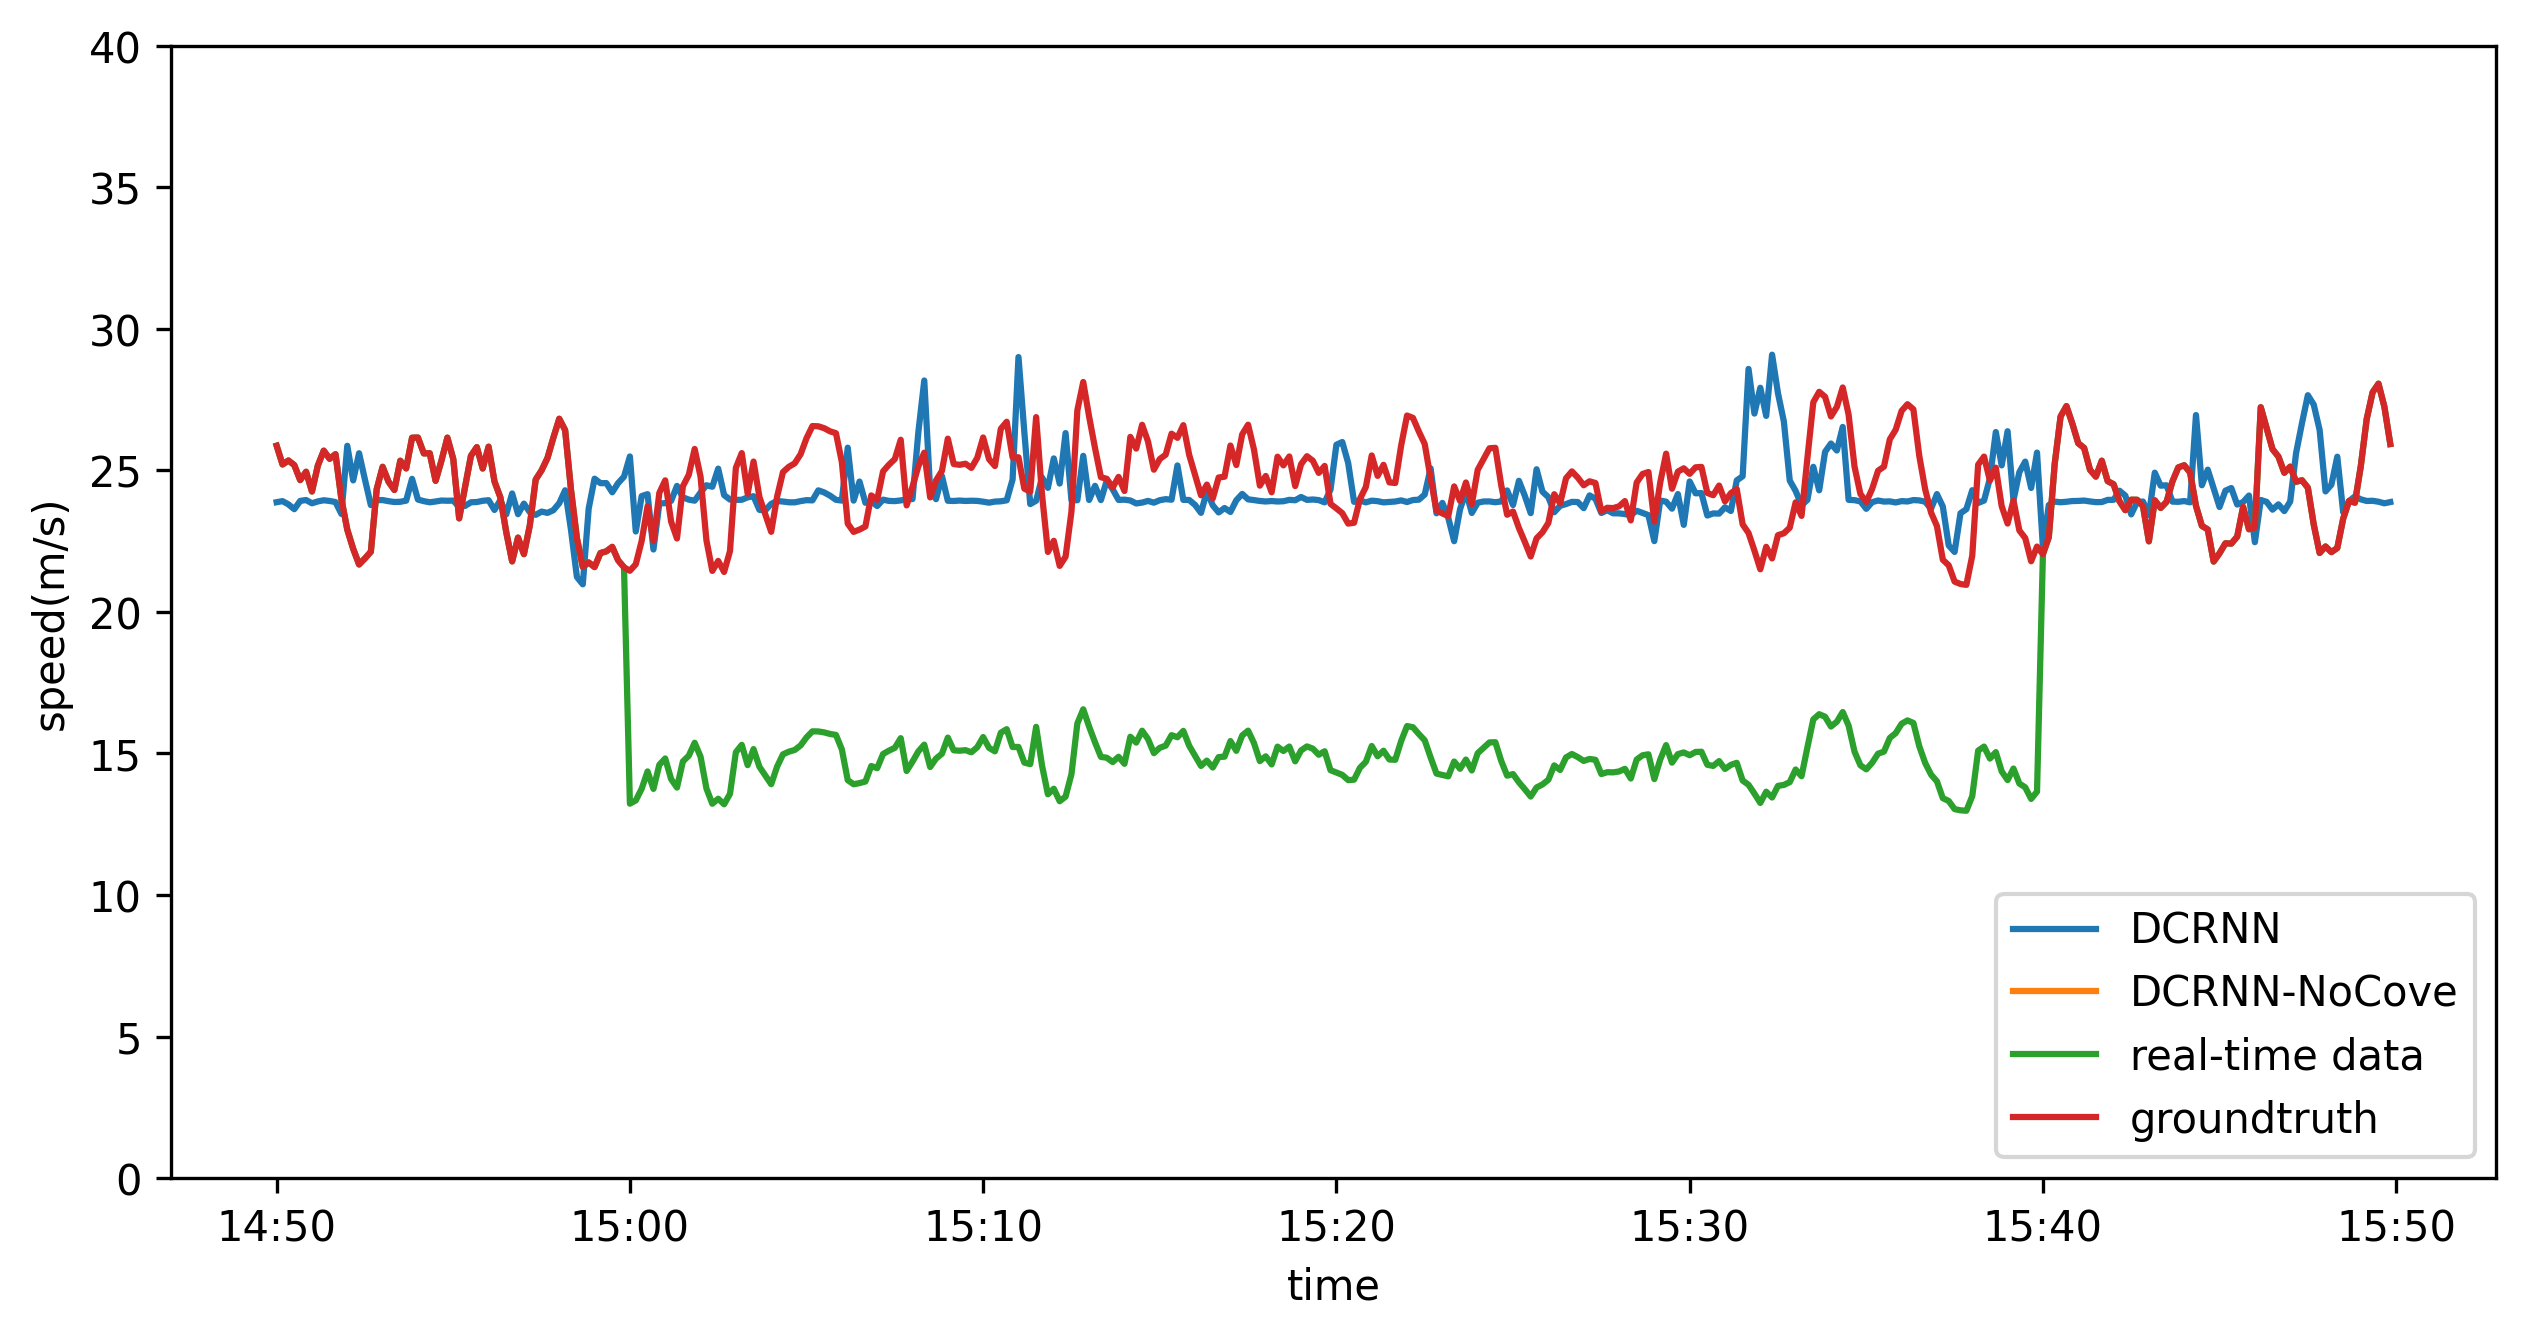

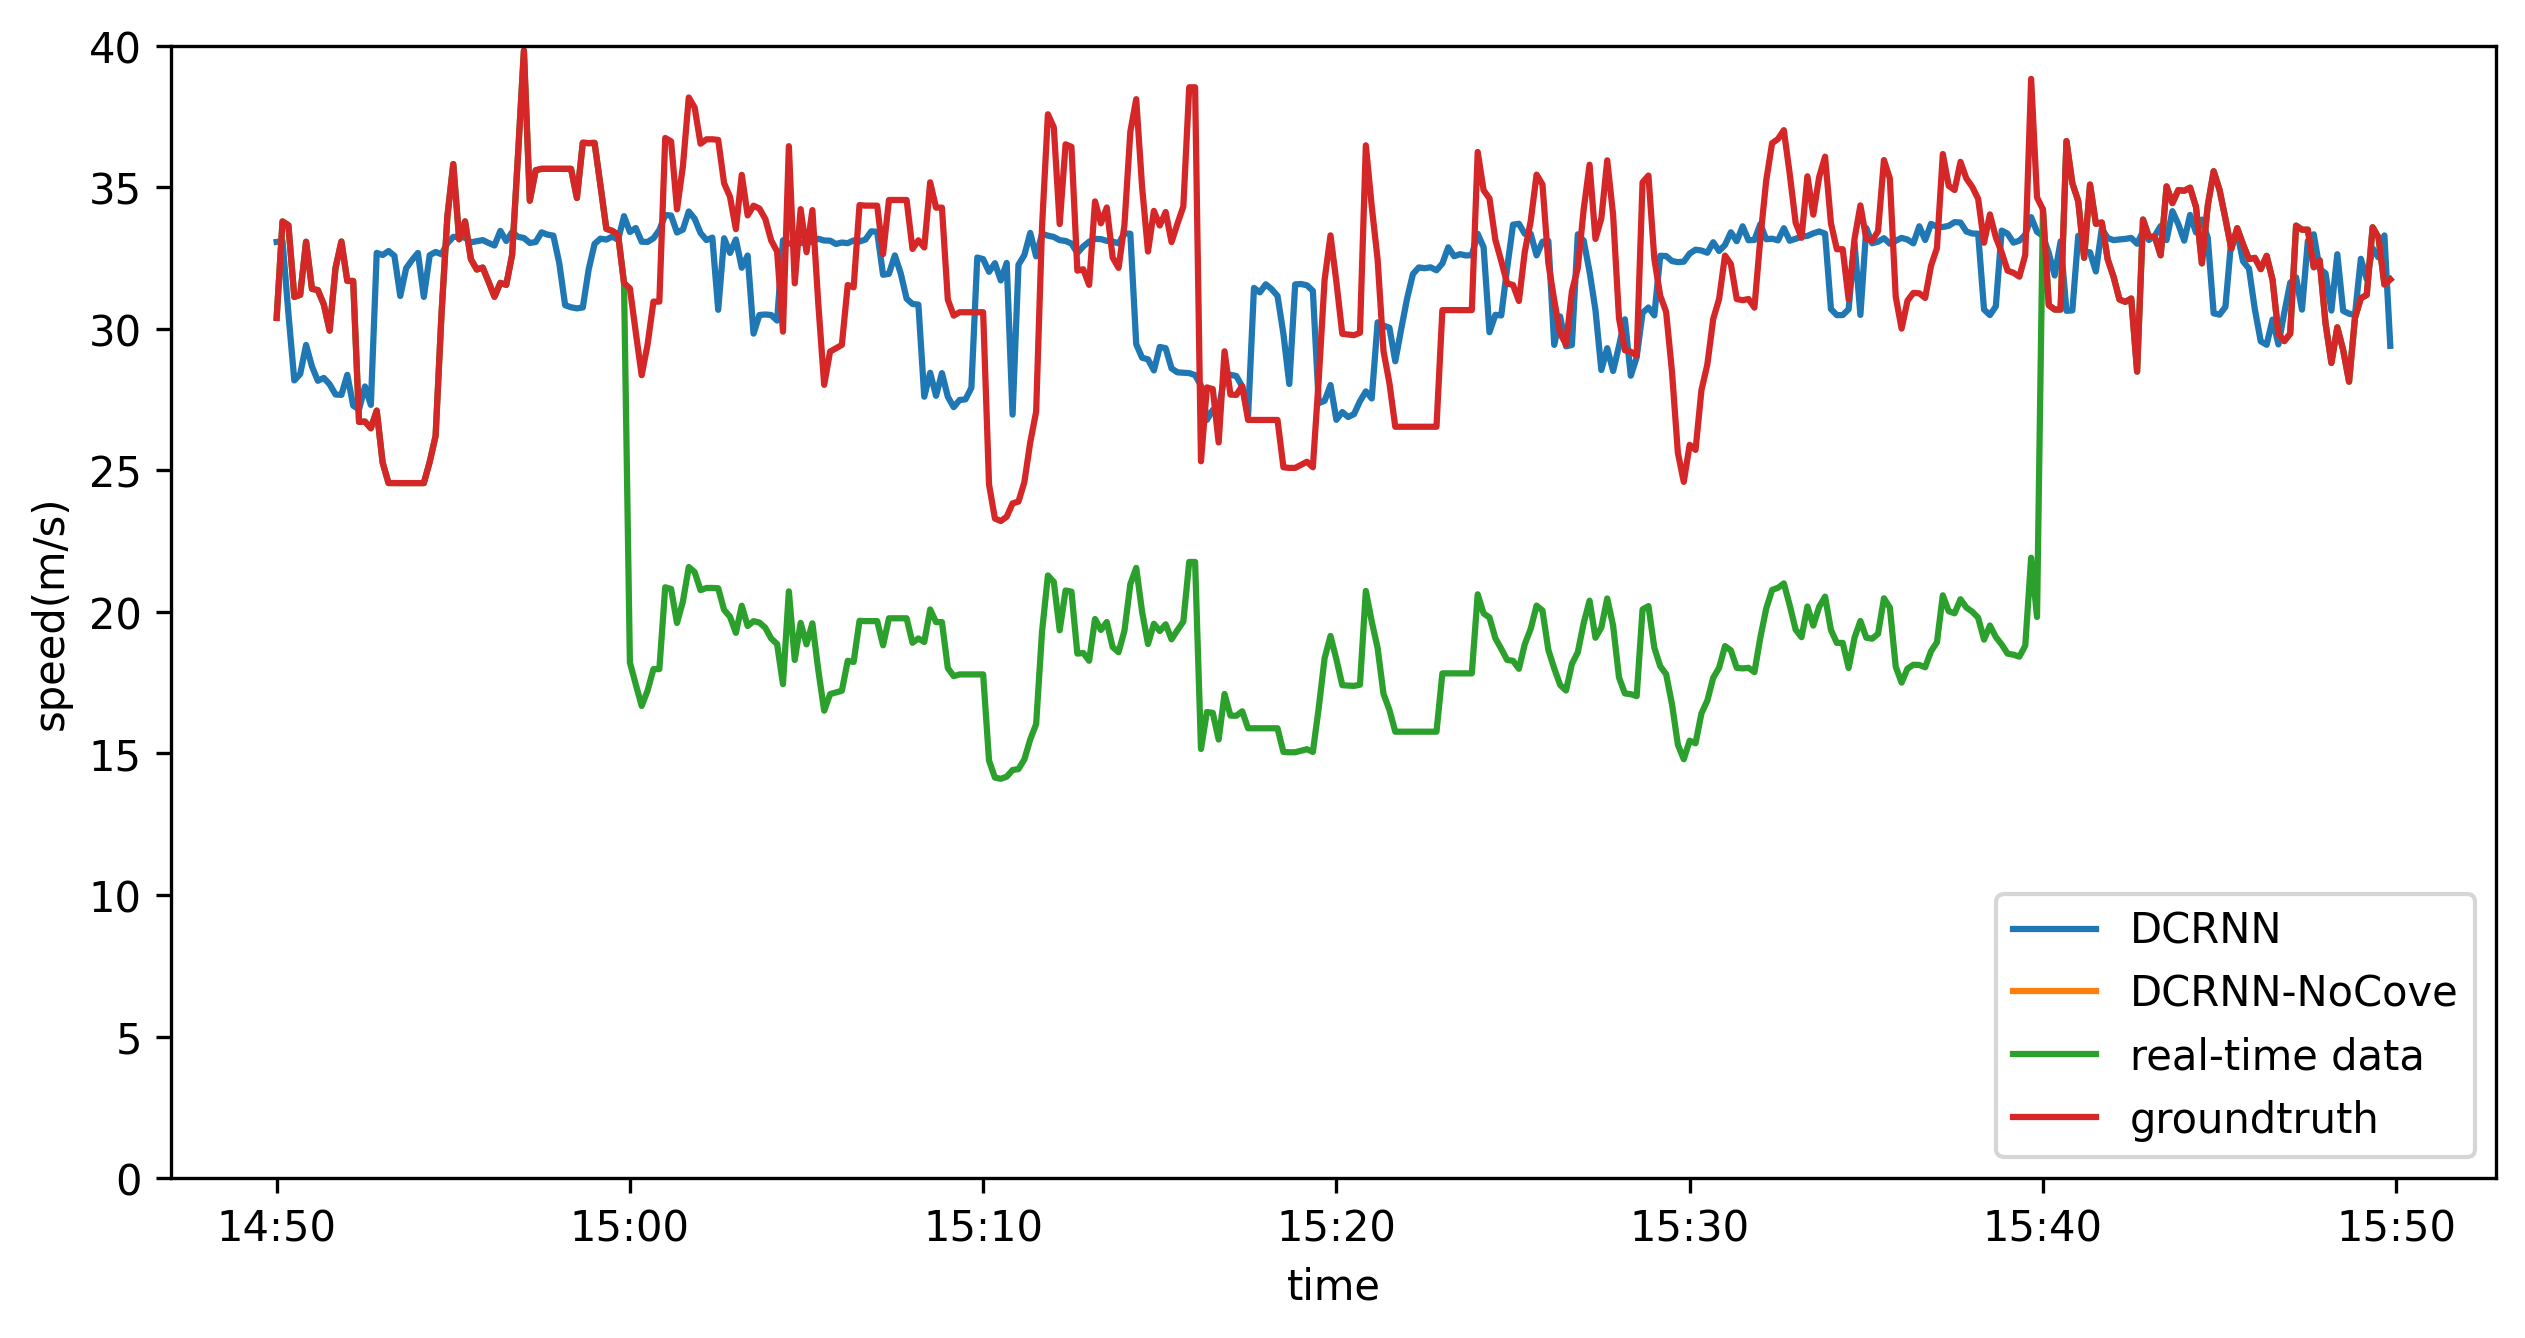

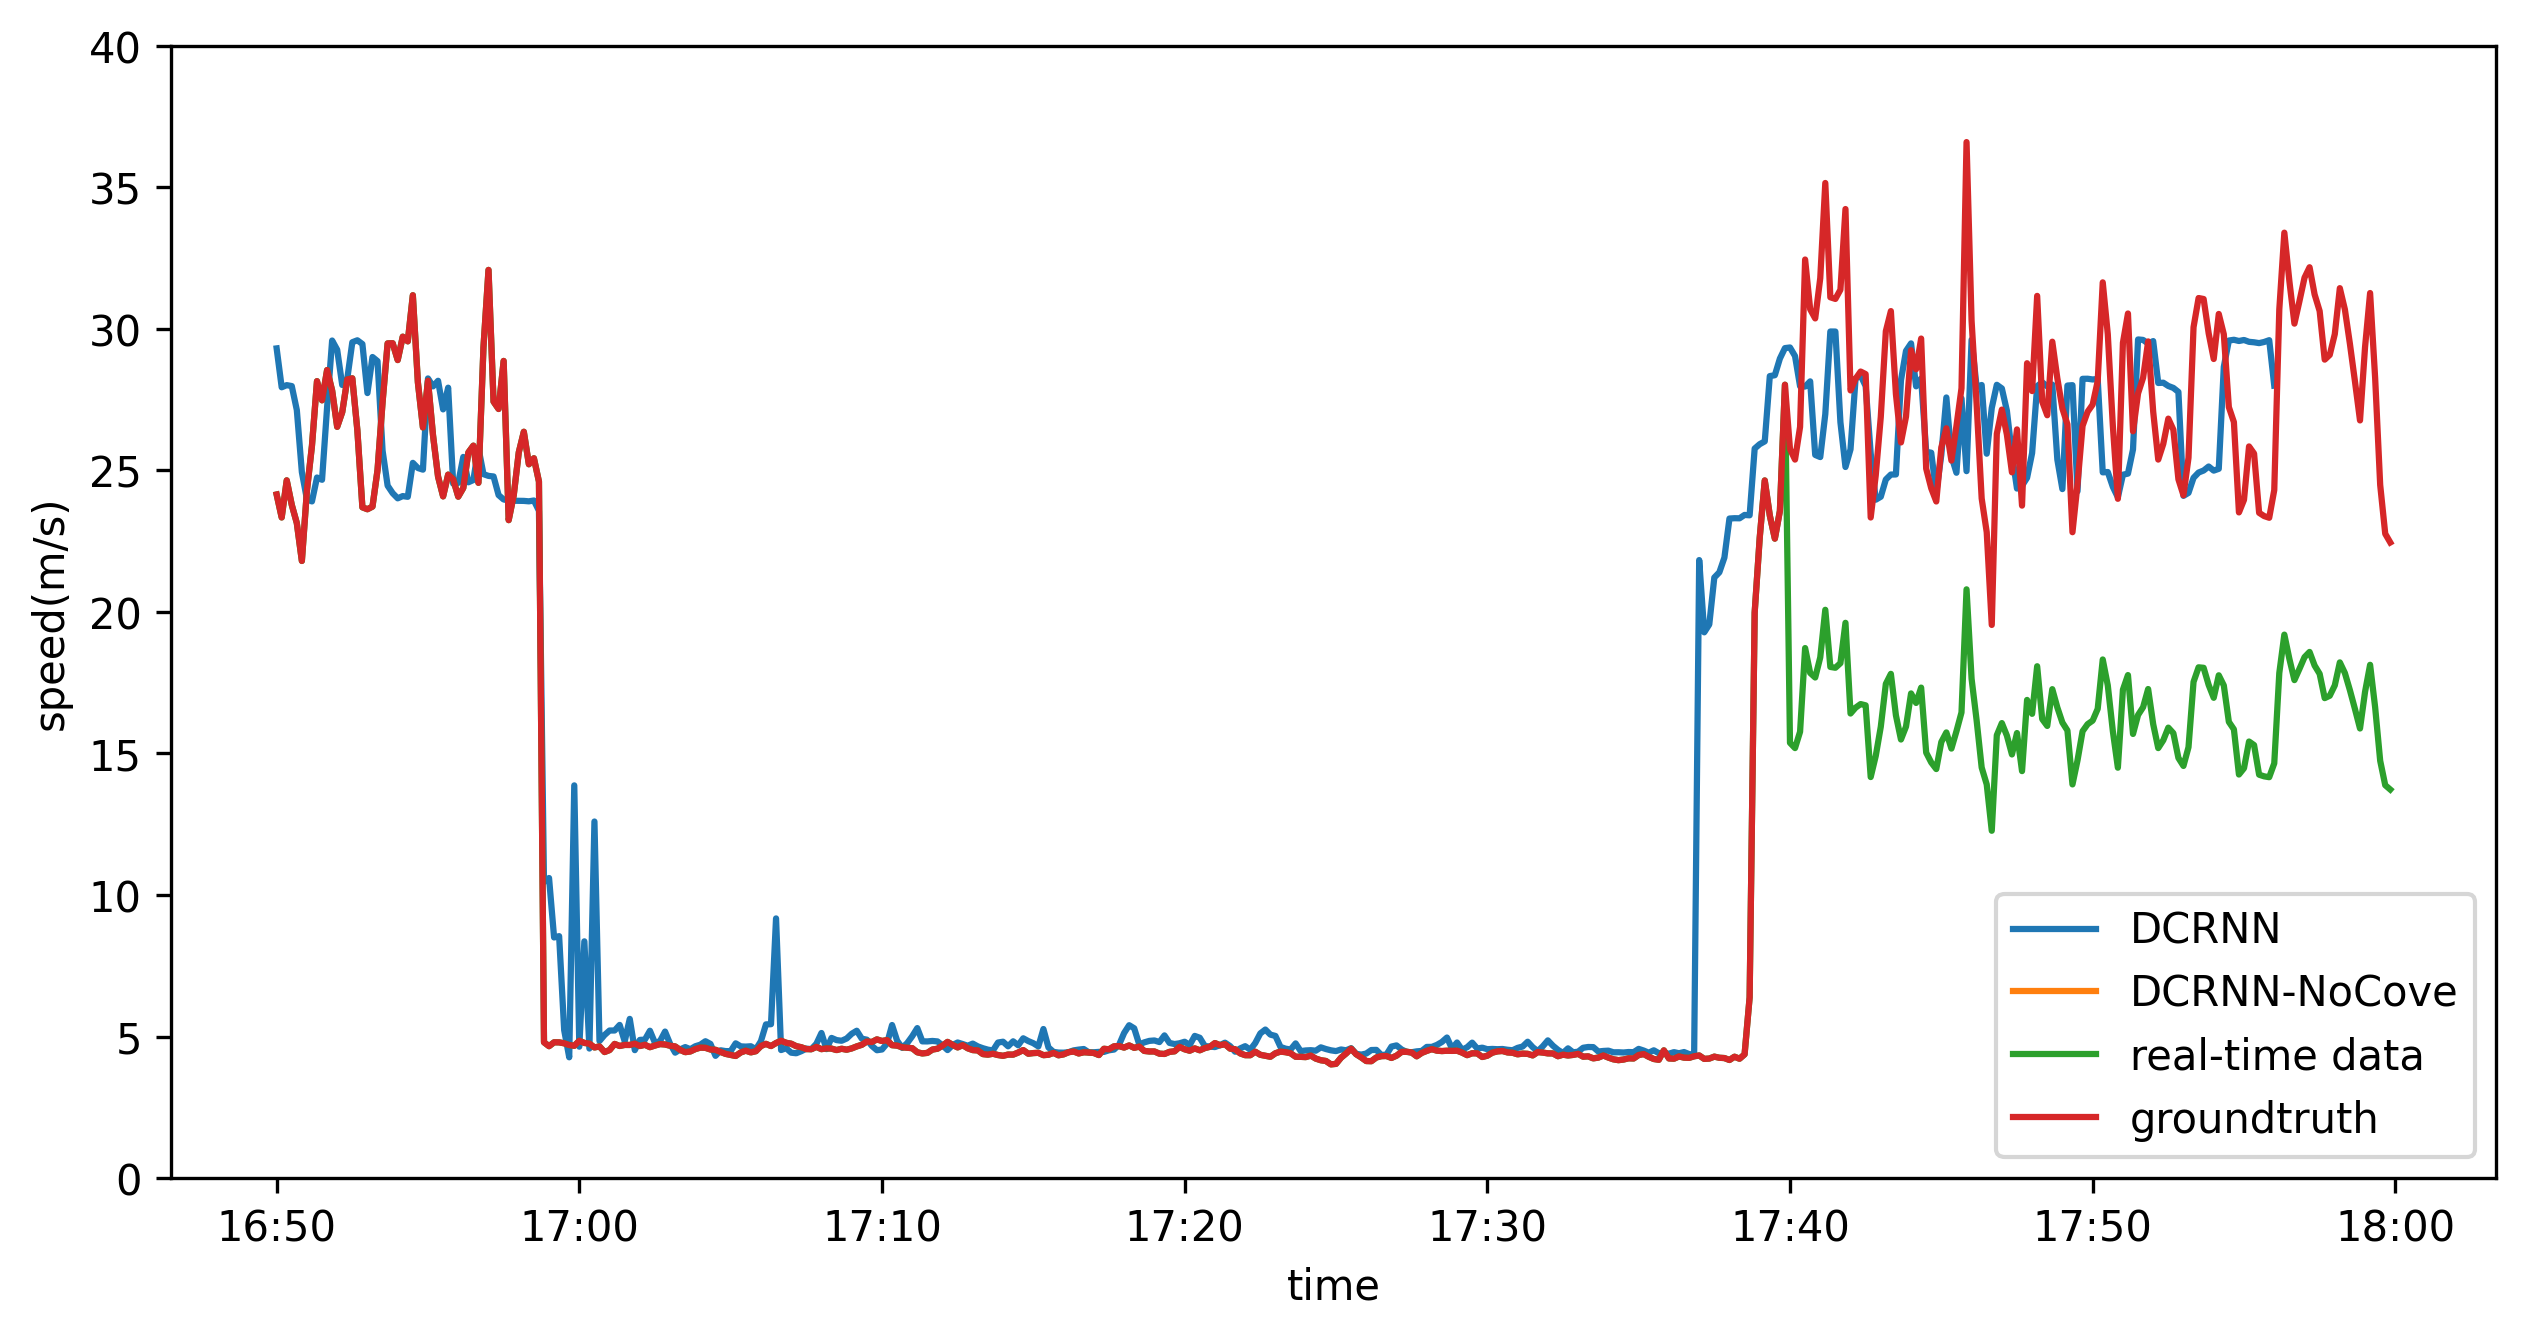

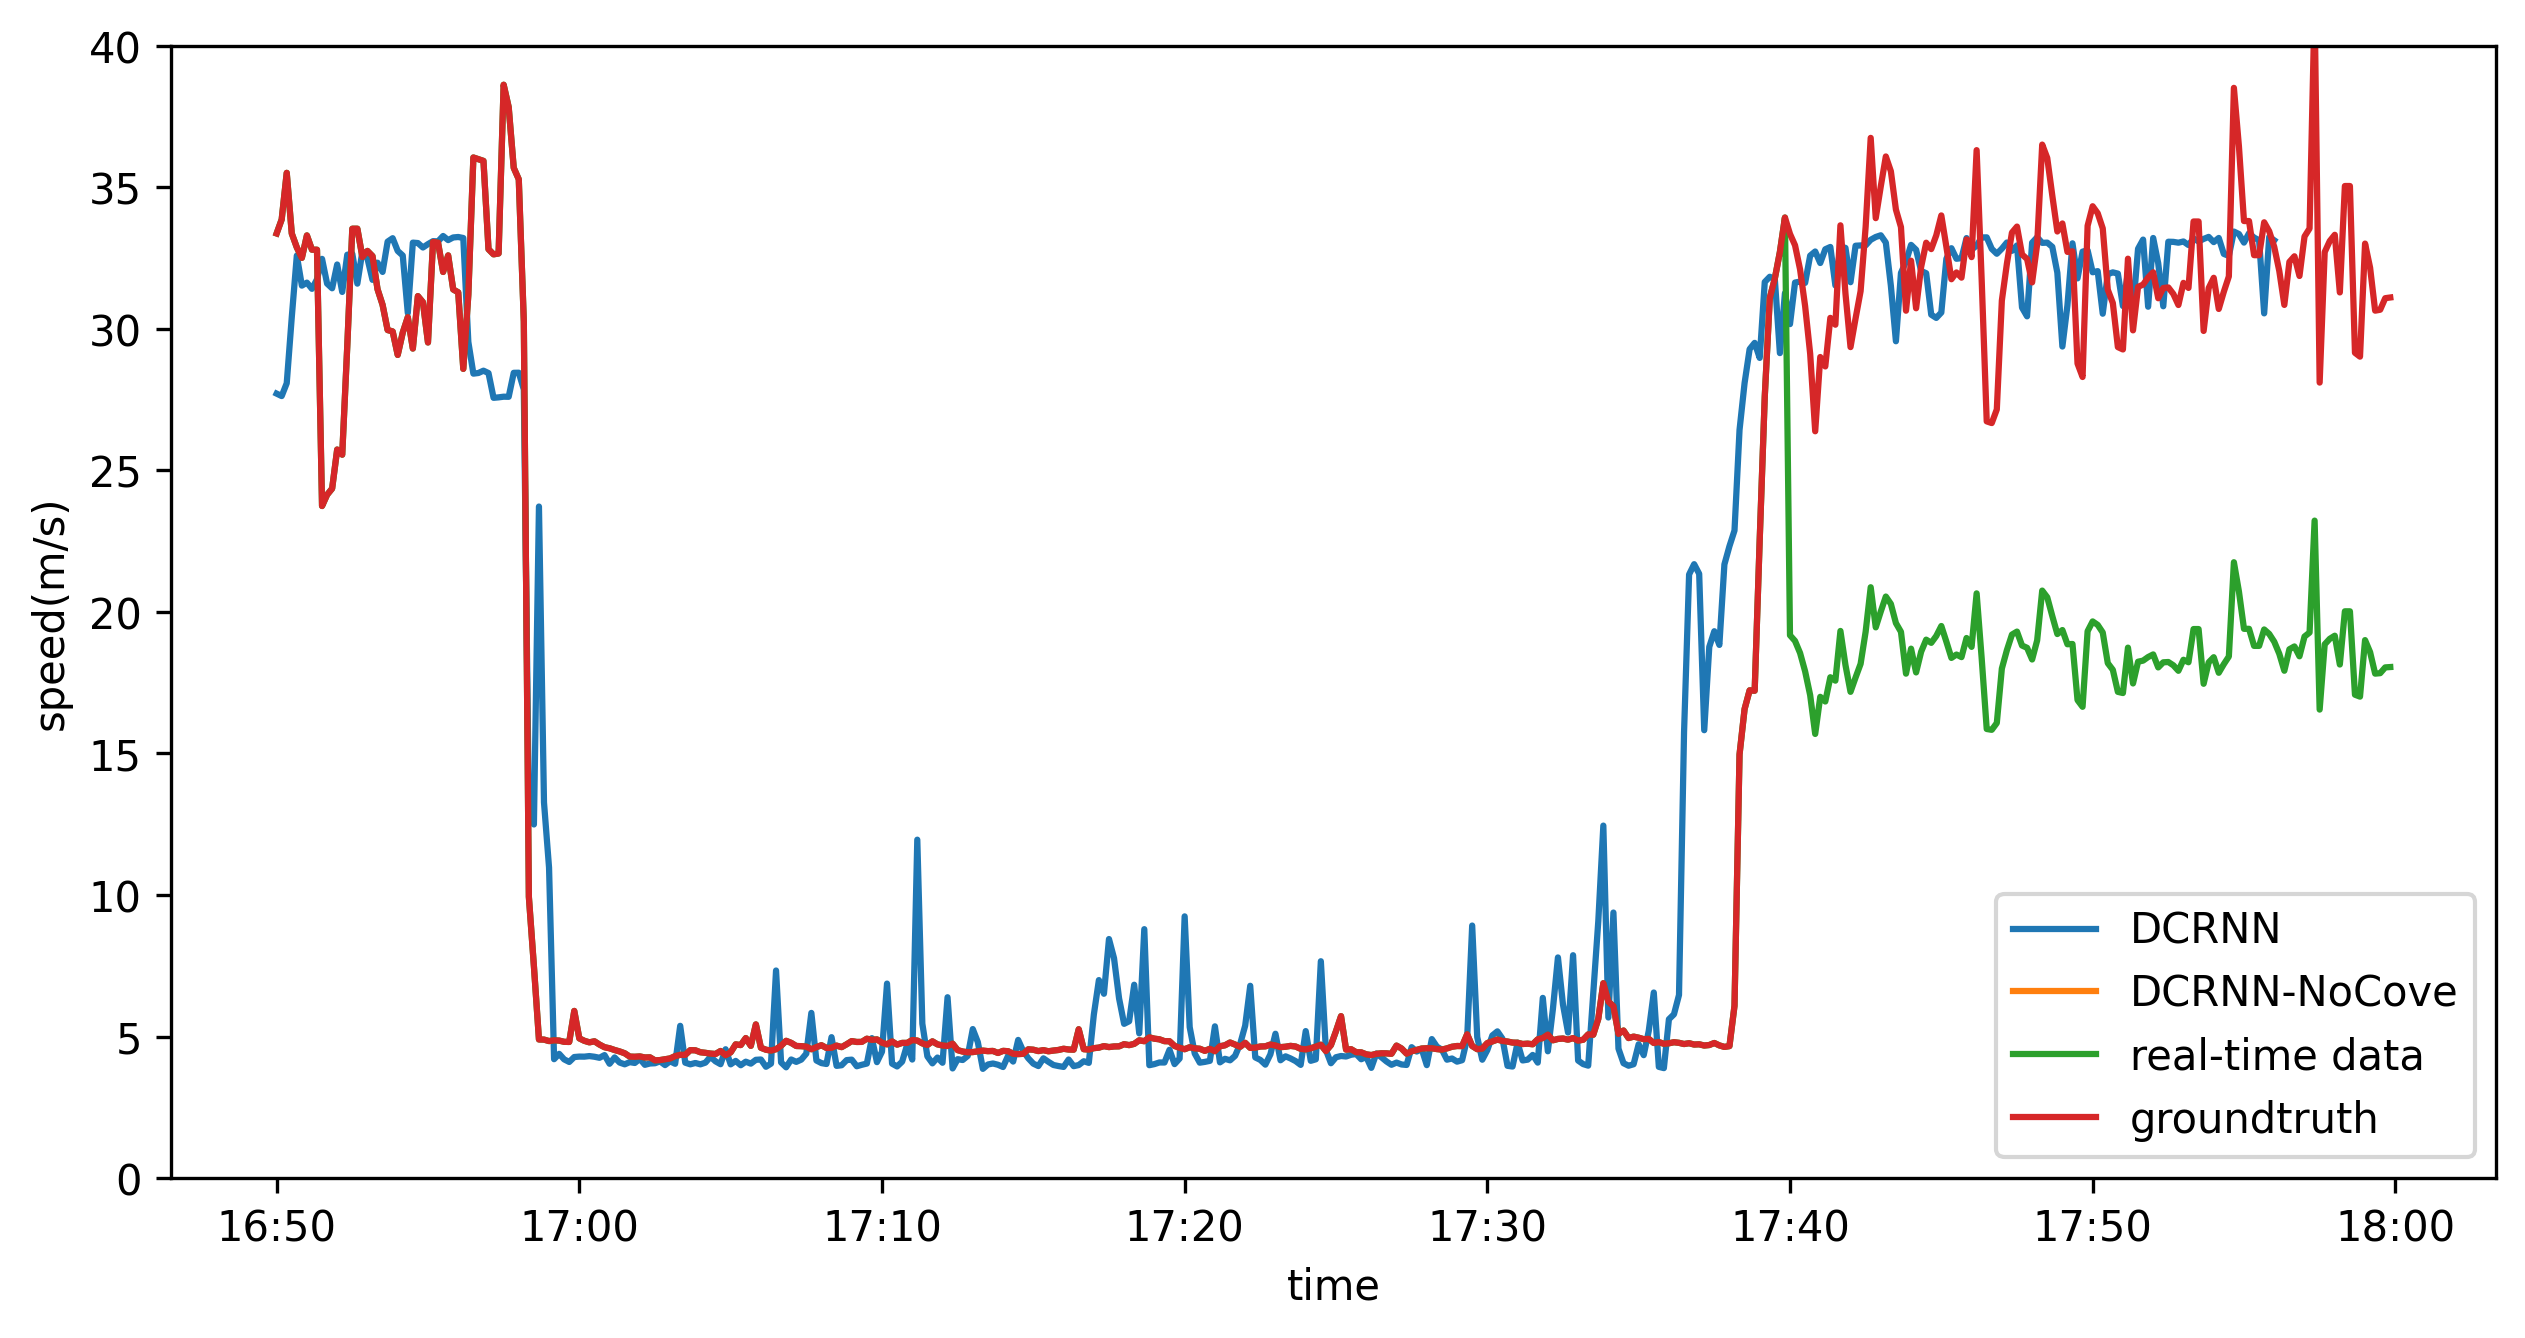

In [ ]:
# 画图
import matplotlib.pyplot as plt

#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_50.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_50.npy', allow_pickle=True)
#b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

non = [None]*30

xs1 = []  #自定义的横坐标
for i in ['14:40','14:50','15:00','15:10','15:20','15:30','15:40','15:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
xs2 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50','18:00','18:10']:
    xs2.append(i)
scale2 = np.arange(len(xs2)) 
 

# figure
# single node fake, 15：00-15：40
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,1740:2100,98])
plt.plot(result1['predictions'][1,1740:2100,98])
#plt.plot(non+list(result1['predictions'][1,:,98]))
plt.plot(a[98][1][1740:2100])
plt.plot(b[98][1][1740:2100])
plt.ylim(0,40)
plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/single_fake_'+exp+'.png', dpi=300)
plt.show()


# multiple nodes fake, 15：00-15：40
plt.figure(2,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,1740:2100,297])
plt.plot(result1['predictions'][1,1740:2100,297])
#plt.plot(non+list(result1['predictions'][1,:,297]))
plt.plot(a[297][1][1740:2100])
plt.plot(b[297][1][1740:2100])
plt.ylim(0,40)
plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/multiple_fake_'+exp+'.png', dpi=300)
plt.show()

# single node extension, 17：40-18：00
plt.figure(3,figsize=(10, 5), dpi=300) 
plt.xticks(scale2,xs2)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,2460:2940,148])
plt.plot(result1['predictions'][1,2460:2940,148])
#plt.plot(non+list(result1['predictions'][1,:,148]))
plt.plot(a[148][1][2460:2940])
plt.plot(b[148][1][2460:2940])
plt.ylim(0,40)
plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/single_extension_'+exp+'.png', dpi=300)
plt.show()

# multiple nodes extension, 17：40-18：00
plt.figure(4,figsize=(10, 5), dpi=300) 
plt.xticks(scale2,xs2)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,2460:2940,44])
plt.plot(result1['predictions'][1,2460:2940,44])
#plt.plot(non+list(result1['predictions'][1,:,44]))
plt.plot(a[44][1][2460:2940])
plt.plot(b[44][1][2460:2940])
plt.ylim(0,40)
plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/multiple_extension_'+exp+'.png', dpi=300)
plt.show()

In [ ]:
print(b[44][1][2750:2760])

[14.965833333333332, 16.56942857142857, 17.23033333333333, 17.215769230769233, 22.559047619047618, 27.60529411764706, 31.092307692307692, 31.779999999999998, 32.71333333333333, 33.93]


In [ ]:
# MSE, MAE, ACC
#exp = 'M_beginning_30'
exp = 'FE_30'
a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_'+exp+'.npy', allow_pickle=True)
#rawdata1 = np.load('/content/drive/MyDrive/MSc/datasets/0913/individual_'+exp+'.npy', allow_pickle=True).item()
rawdata1 = np.load('/content/drive/MyDrive/MSc/datasets/0913/individual_FE_30_linlane.npy', allow_pickle=True).item()

id = ['56250003#0_0%1', '237111029#1.254_0%1', '238459506.6_0%1', '62830645#2.0.0_0%1']
lane_id = '237111029#1.254_0%0'
time = [1800, 2760, 30, 2520]
time1 = 1800
time2 = time1+6
lane_index = lane_list.tolist().index(lane_id)

# MSE MAE
#predic1 = result1['predictions'][1,30:36,lane_index] 
predic1 = result['predictions'][1,time1:time2,lane_index] 
target1 = a[lane_index][1][time1:time2]
predic_plain = result['predictions'][0,time1-600:time2-600,lane_index]
target_plain = a[lane_index][1][time1-600:time2-600]

def MASE(a,b):
  error = []
  for i in range(len(a)):
    error.append(a[i]-b[i])

  squaredError = []
  absError = []
  for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

  from math import sqrt
  mse = sum(squaredError)/len(squaredError)
  mae = sum(absError)/len(absError)
  return mse, mae

mse, mae = MASE(predic1, target1)
mse_plane, mae_plane = MASE(predic_plain, target_plain)

print('MSE = ', mse)
print('MAE = ', mae)


# accuracy
target = rawdata1[lane_id]['Original'][1:7]
attacker = list(rawdata1[lane_id]['Attacker'][1:7])
predic = result['predictions'][1,time1:time2,lane_index]
#predic = result1['predictions'][1,31:37,lane_index]

acc_all = []
acc_att = []
at = []
for i in range(len(target)):
  atta = list(attacker[i])
  if atta[0] == 'N':
    continue
  for sample in target[i]:
    error = sample[0]-predic[i]
    squaredError = error * error
    absError = abs(error)
    at.append(absError)
    
    if absError > 1*mae:   # MAE
    #if squaredError > 1*mse_plain:
      if sample[1] in atta:
        #print(sample[1])
        #print(atta)
        atta.remove(sample[1])
        acc_att.append(1)
        acc_all.append(1)
      else:
        acc_all.append(0)
        #print(i,sample)
  #print(len(atta))
  acc_att.extend(np.zeros(len(atta), dtype=int, order='C'))
  acc_all.extend(np.zeros(len(atta), dtype=int, order='C'))

print('ACC for all users = ', np.mean(acc_all))
print('ACC for attackers = ', np.mean(acc_att))

MSE =  0.0041608661269357215
MAE =  0.06450477600097315


IndexError: ignored

In [ ]:
print(target[0:4])
print(attacker)
print(predic)
print(target1)
print(result['groundtruth'][1,time1:time1+4,lane_index])
print(result1['groundtruth'][1,30:36,lane_index])

[[(30.14, '32427-CLONEC1-1-1-i1-CLONEC1'), (4.0840981472056646, '31248-CLONEC1-1-i1-CLONEC1')], [(29.92, '32427-CLONEC1-1-1-i1-CLONEC1'), (4.702251218431359, '32427-CLONEC1-1-1-i1-CLONEC1')], [(28.28, '30055-CLONEC1-1-i1-CLONEC1'), (4.569701760368025, '35289-CLONEC1-0-CLONEC1-0-CLONEC1-i1-CLONEC1')], [(40.26, '35289-CLONEC1-0-CLONEC1-0-CLONEC1-i1-CLONEC1'), (4.977526486124731, '32427-CLONEC1-0-1-CLONEC1-i1')]]
[('31248-CLONEC1-1-i1-CLONEC1',), ('32427-CLONEC1-1-1-i1-CLONEC1',), ('35289-CLONEC1-0-CLONEC1-0-CLONEC1-i1-CLONEC1',), ('32427-CLONEC1-0-1-CLONEC1-i1',), ('30055-CLONEC1-1-i1-CLONEC1',), ('32427-CLONEC1-0-1-CLONEC1-i1', '26416-CLONEC1-0-i2-CLONEC1')]
[30.672276 30.560593 29.384737 29.39525  29.38935  30.929413]
[16.451666666666668, 17.77875, 18.224444444444448, 18.554375, 18.35833333333333, 16.403333333333332]
[29.1625     28.0075     31.11333333 28.35      ]


NameError: ignored

In [ ]:
def MASE(a,b):
  error = []
  for i in range(len(a)):
    error.append(a[i]-b[i])

  squaredError = []
  absError = []
  for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

  from math import sqrt
  mse = sum(squaredError)/len(squaredError)
  mae = sum(absError)/len(absError)
  return mse, mae

predic1 = result['predictions'][1,2460:2490,148]
target1 = b[148][1][2460:2490]
mse, mae = MASE(predic1, target1)
print('MSE = ', mse)
print('MAE = ', mae)

predic2 = result['predictions'][1,2550:2580,148]
target2 = b[148][1][2550:2580]
mse, mae = MASE(predic2, target2)
print('MSE = ', mse)
print('MAE = ', mae)

MSE =  14.399038103724646
MAE =  3.3881237860785585
MSE =  0.7586324878468769
MAE =  0.4161060983783095


In [ ]:
# M
exp = 'beginning_30'
rawdata = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_M_'+exp+'.npy', allow_pickle=True).item()
#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/M_beginning_30.npz', allow_pickle=True)
result1 = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn_predictions_0.npz', allow_pickle=True)
result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/original.npz', allow_pickle=True)
a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_M_'+exp+'.npy', allow_pickle=True)
b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)
lane_list = np.load('/content/drive/MyDrive/MSc/net/lane_list.npy', allow_pickle=True)
id = ['56250003#0_0%1', '237111029#1.254_0%1', '238459506.6_0%1', '62830645#2.0.0_0%1']
time = [1800, 2040, 2760, 2850, 2520, 2640, 2760]

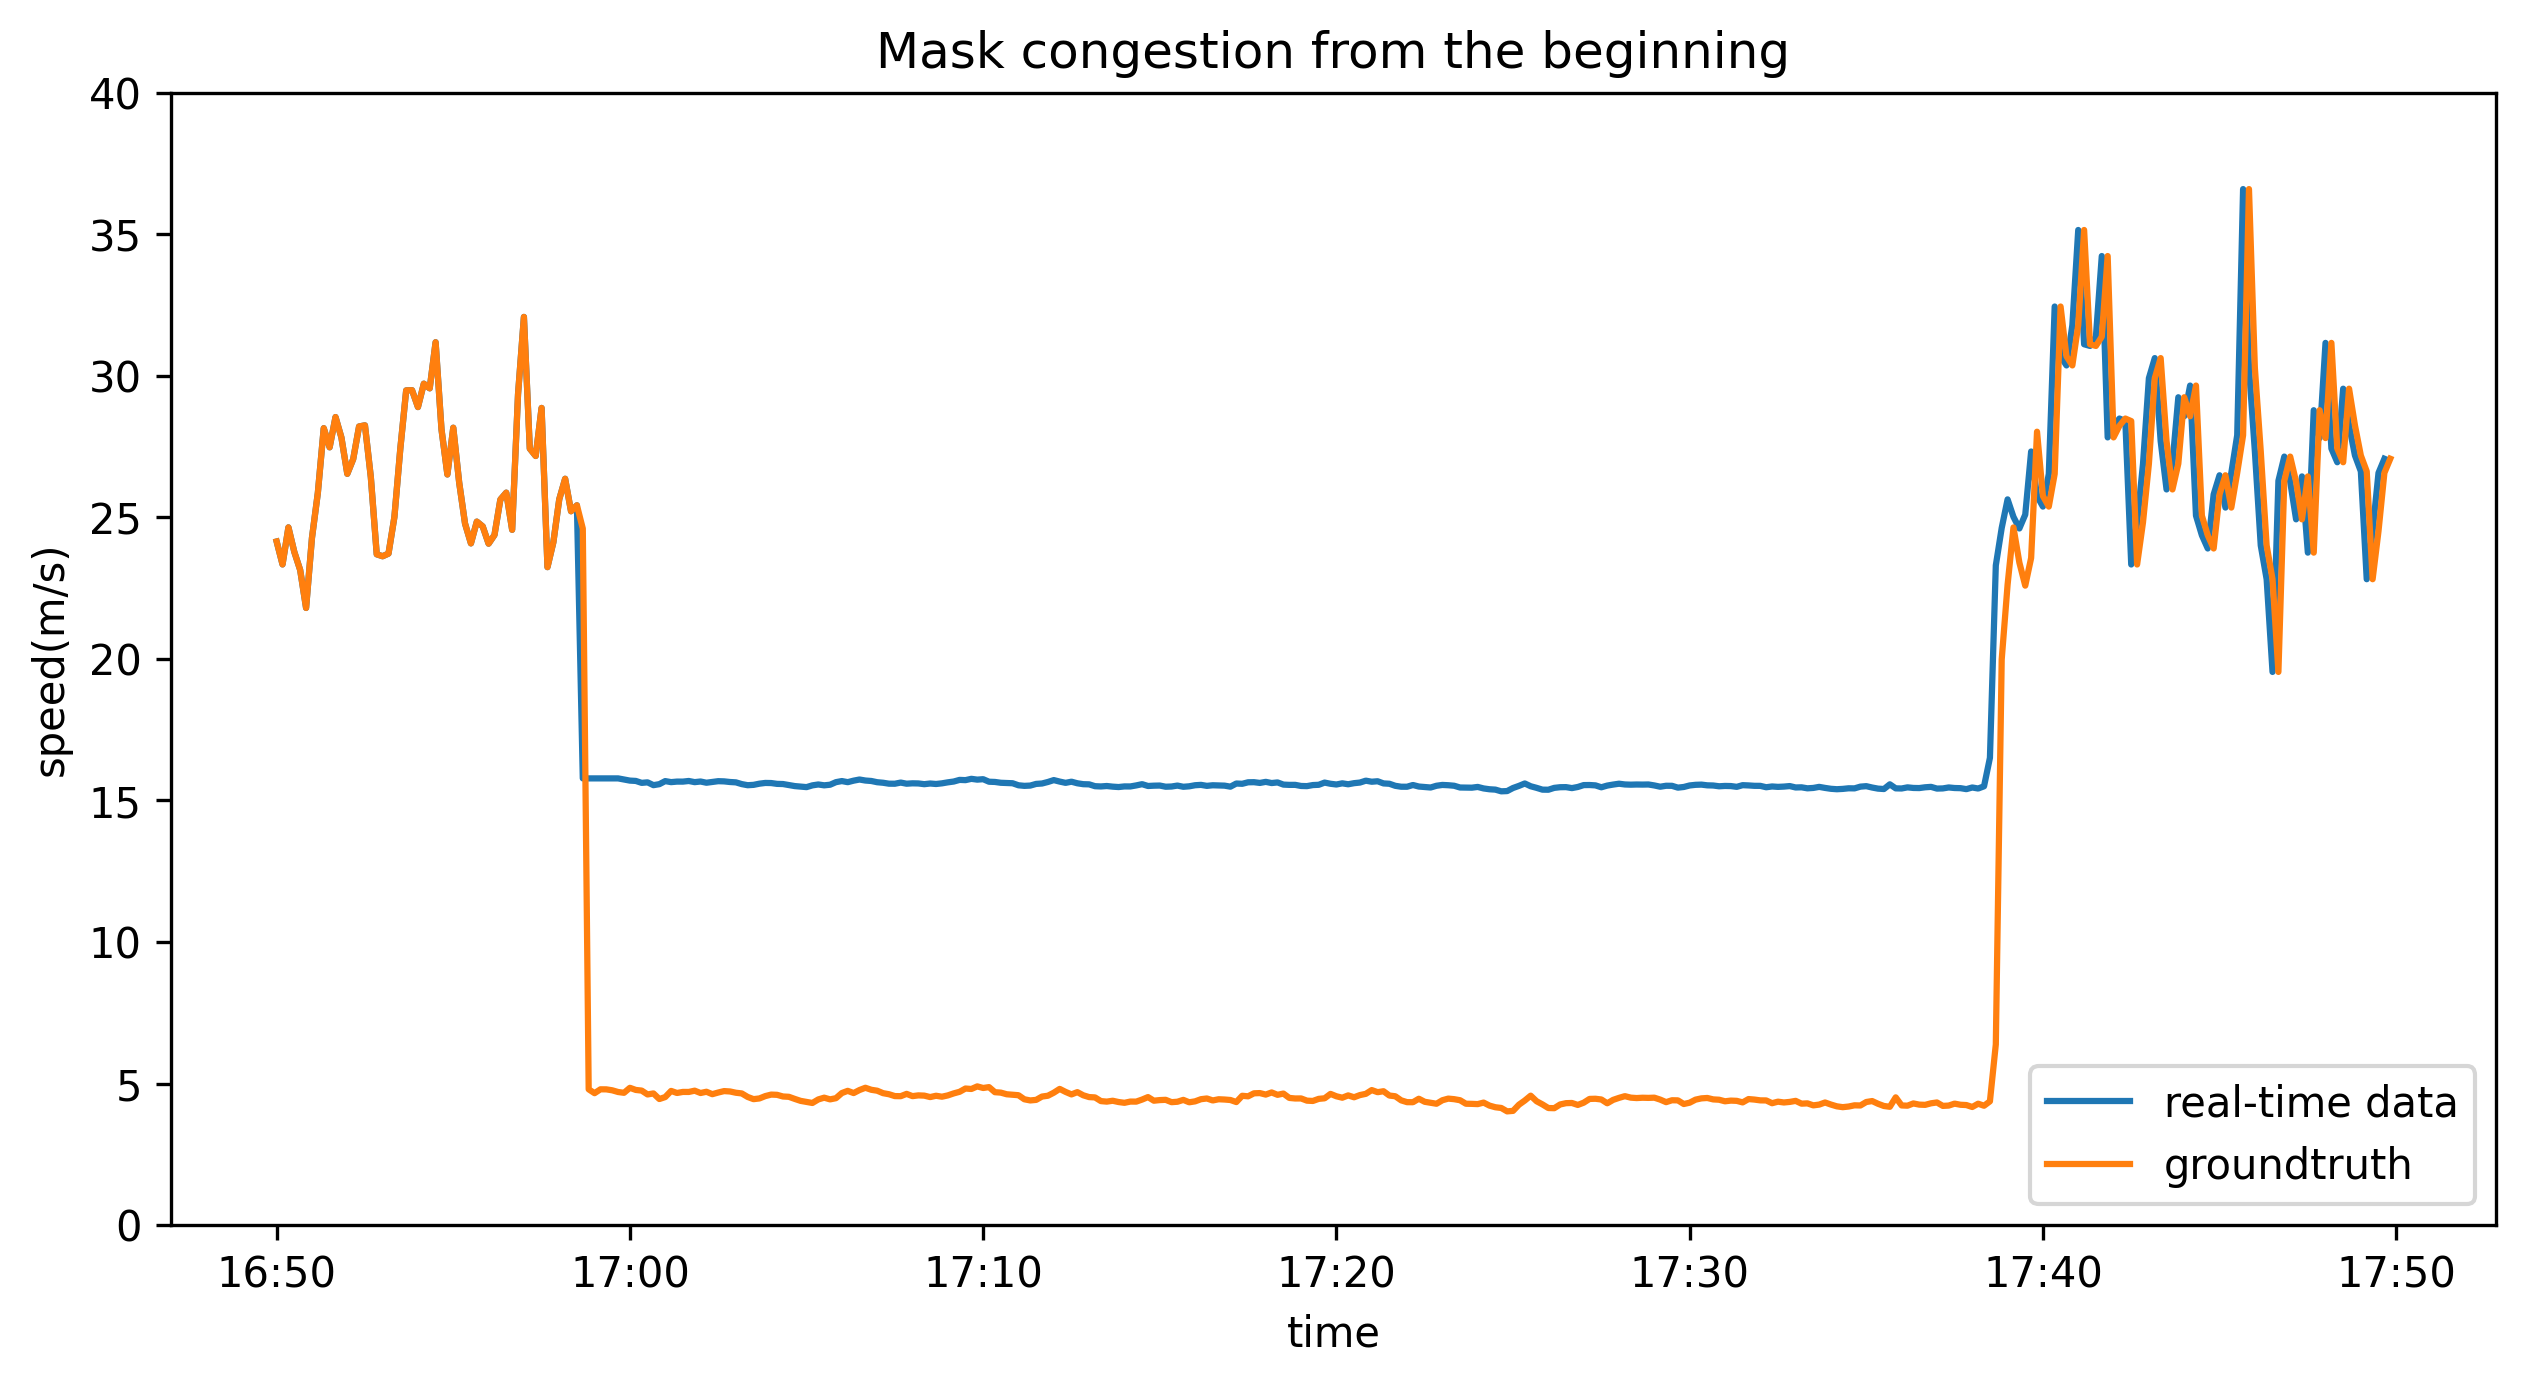

In [ ]:
# 画图 M
import matplotlib.pyplot as plt

#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_50.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_50.npy', allow_pickle=True)
#b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

non = [None]*30

xs1 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
 

# figure
# single node mask from beginning, 17：00-17：40
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(a[148][1][2460:2460+52]+ [15.78]*7 +a[148][1][2460+60:2820])
#plt.plot(a[148][1][2460:2820])
plt.plot(b[148][1][2460:2820])
plt.ylim(0,40)
plt.legend(labels=["real-time data","groundtruth"],loc="lower right")
plt.title("Mask congestion from the beginning")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/mask_beginning.png', dpi=300)
plt.show()

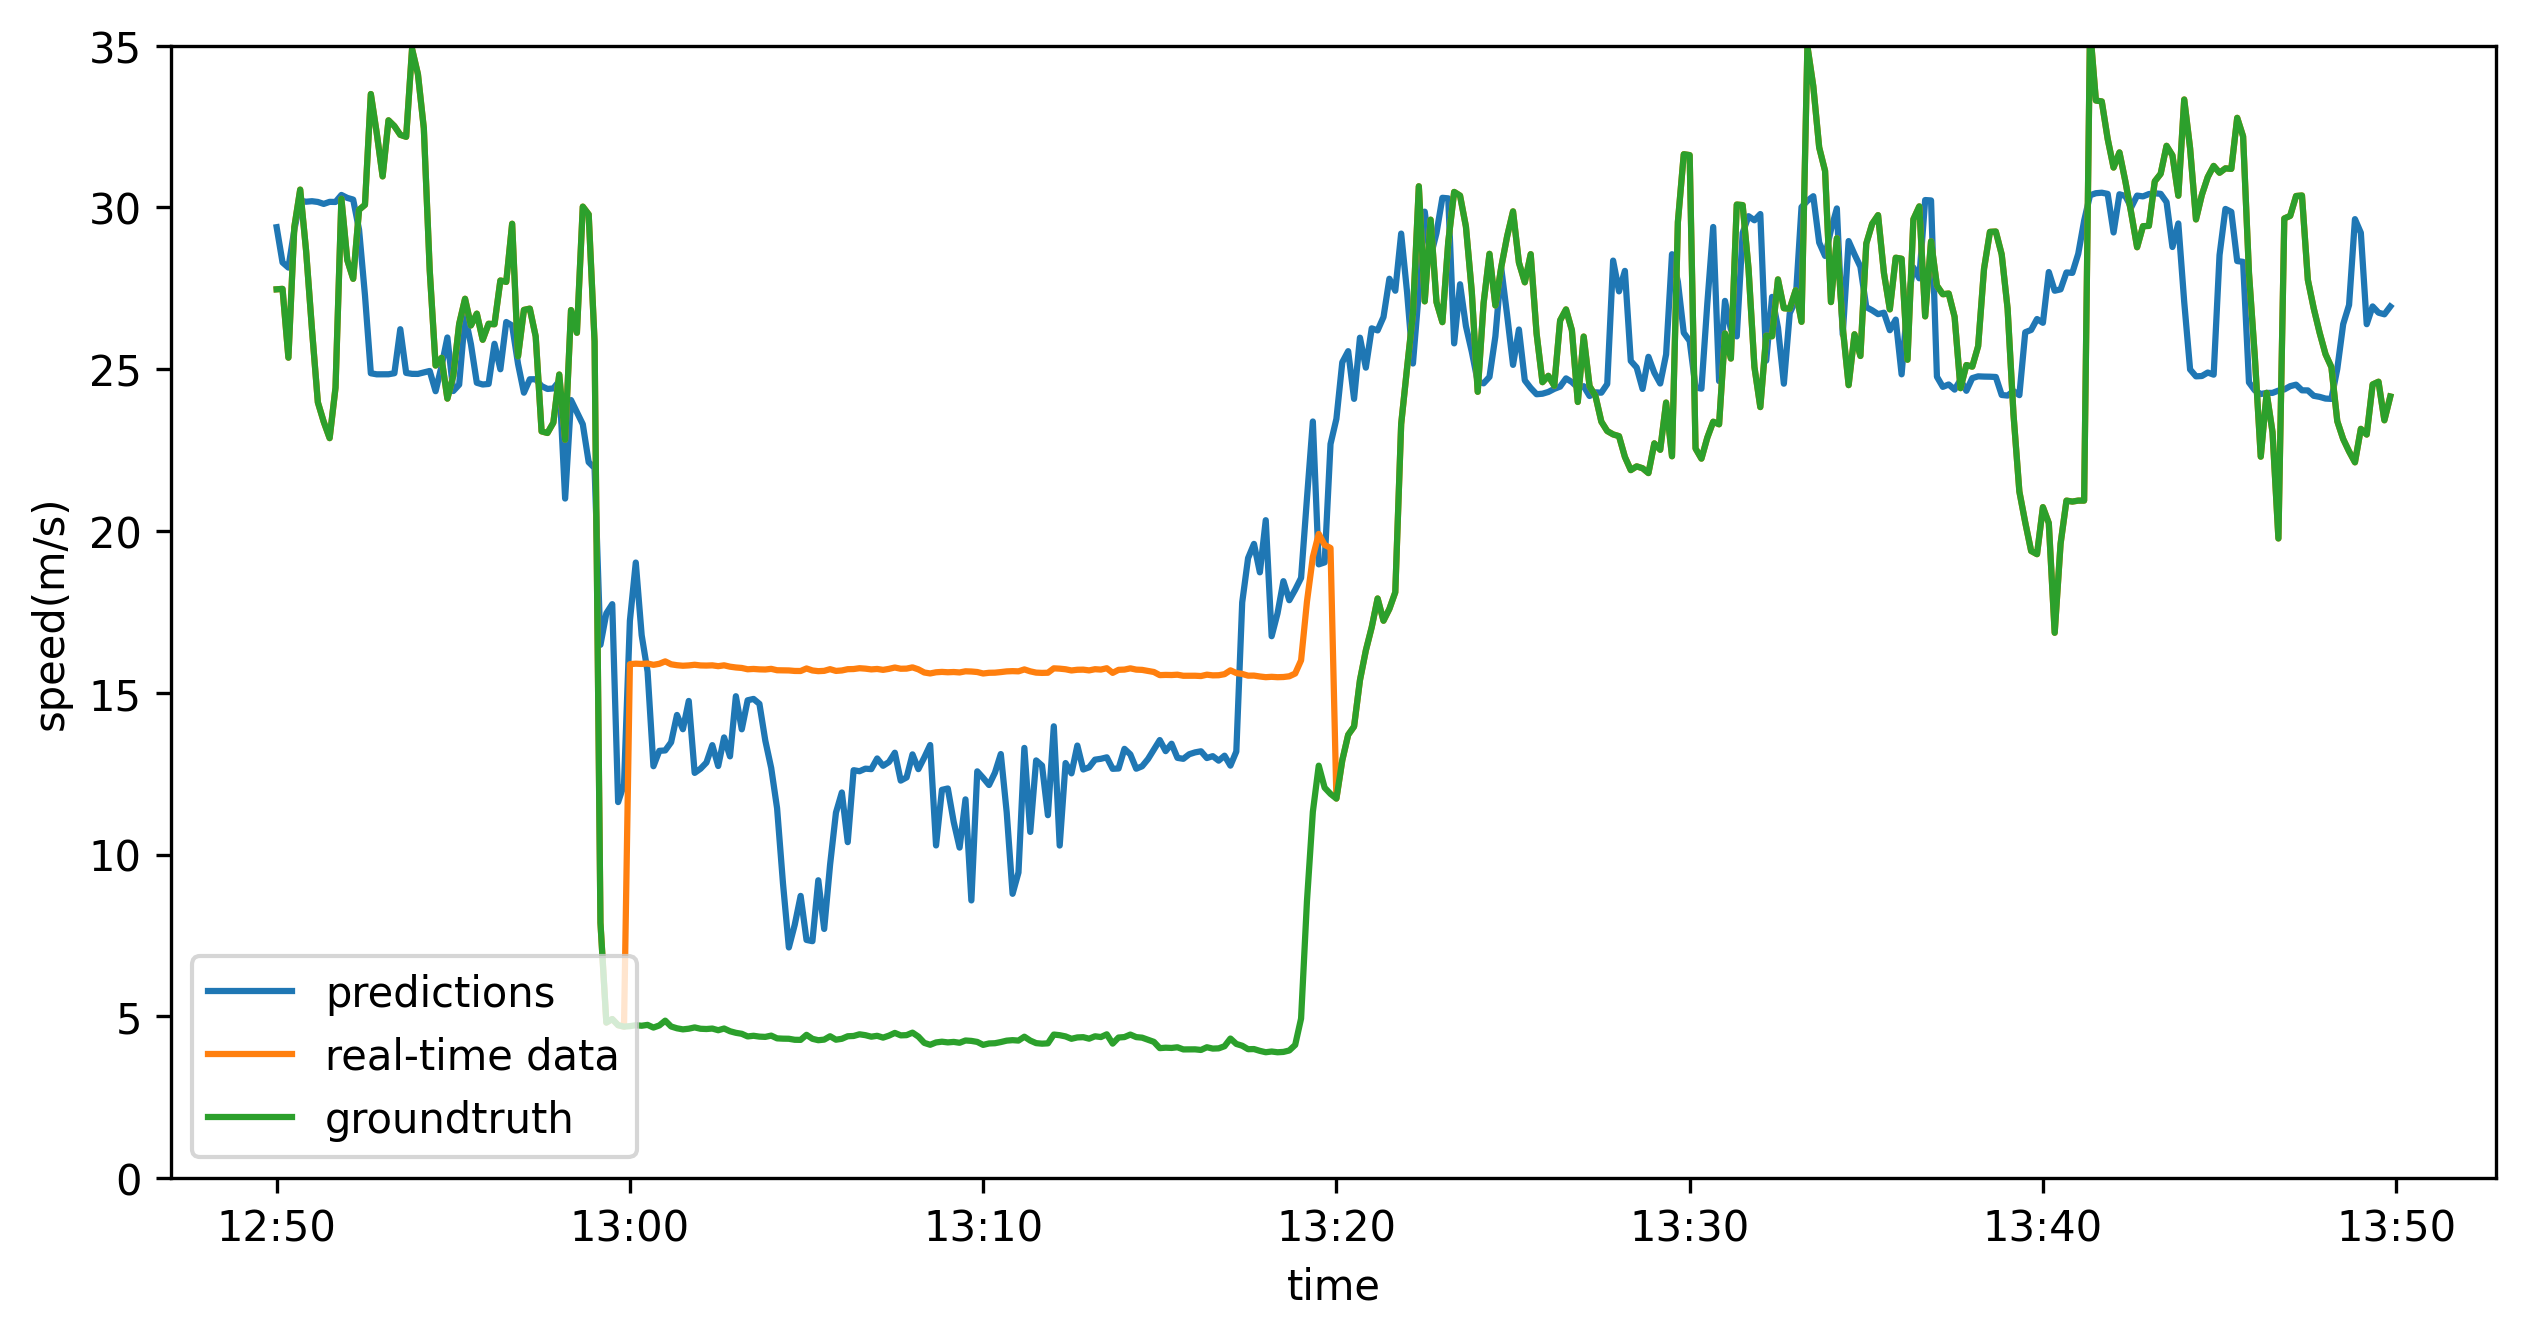

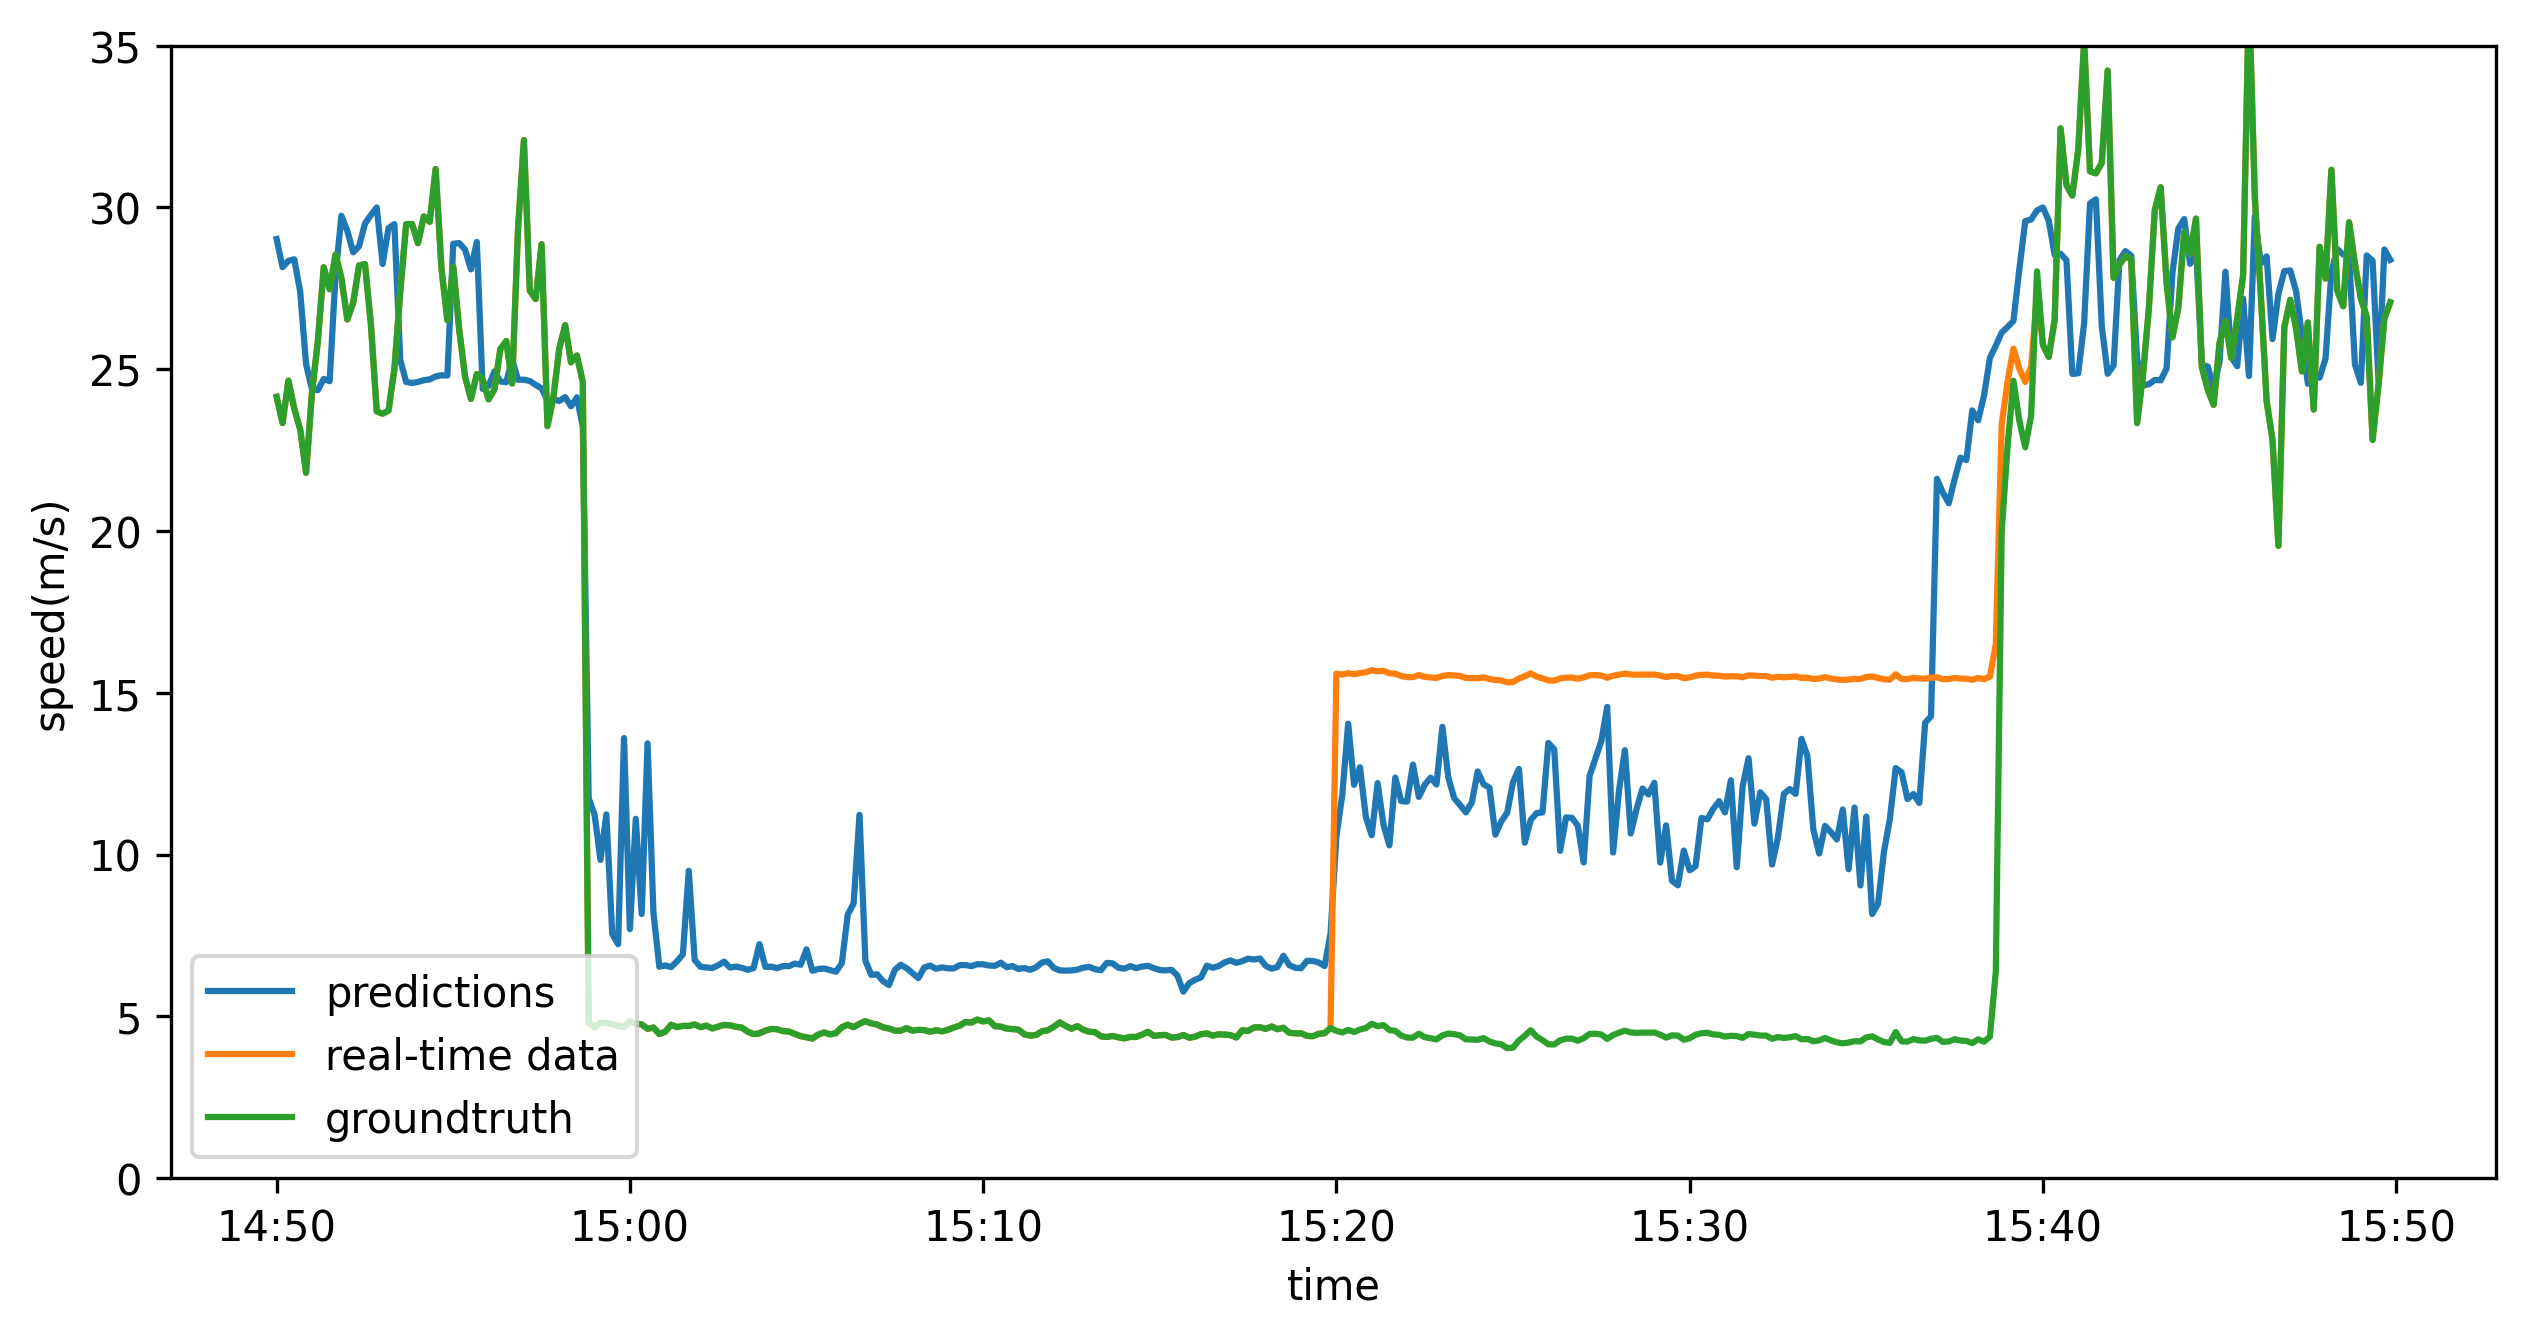

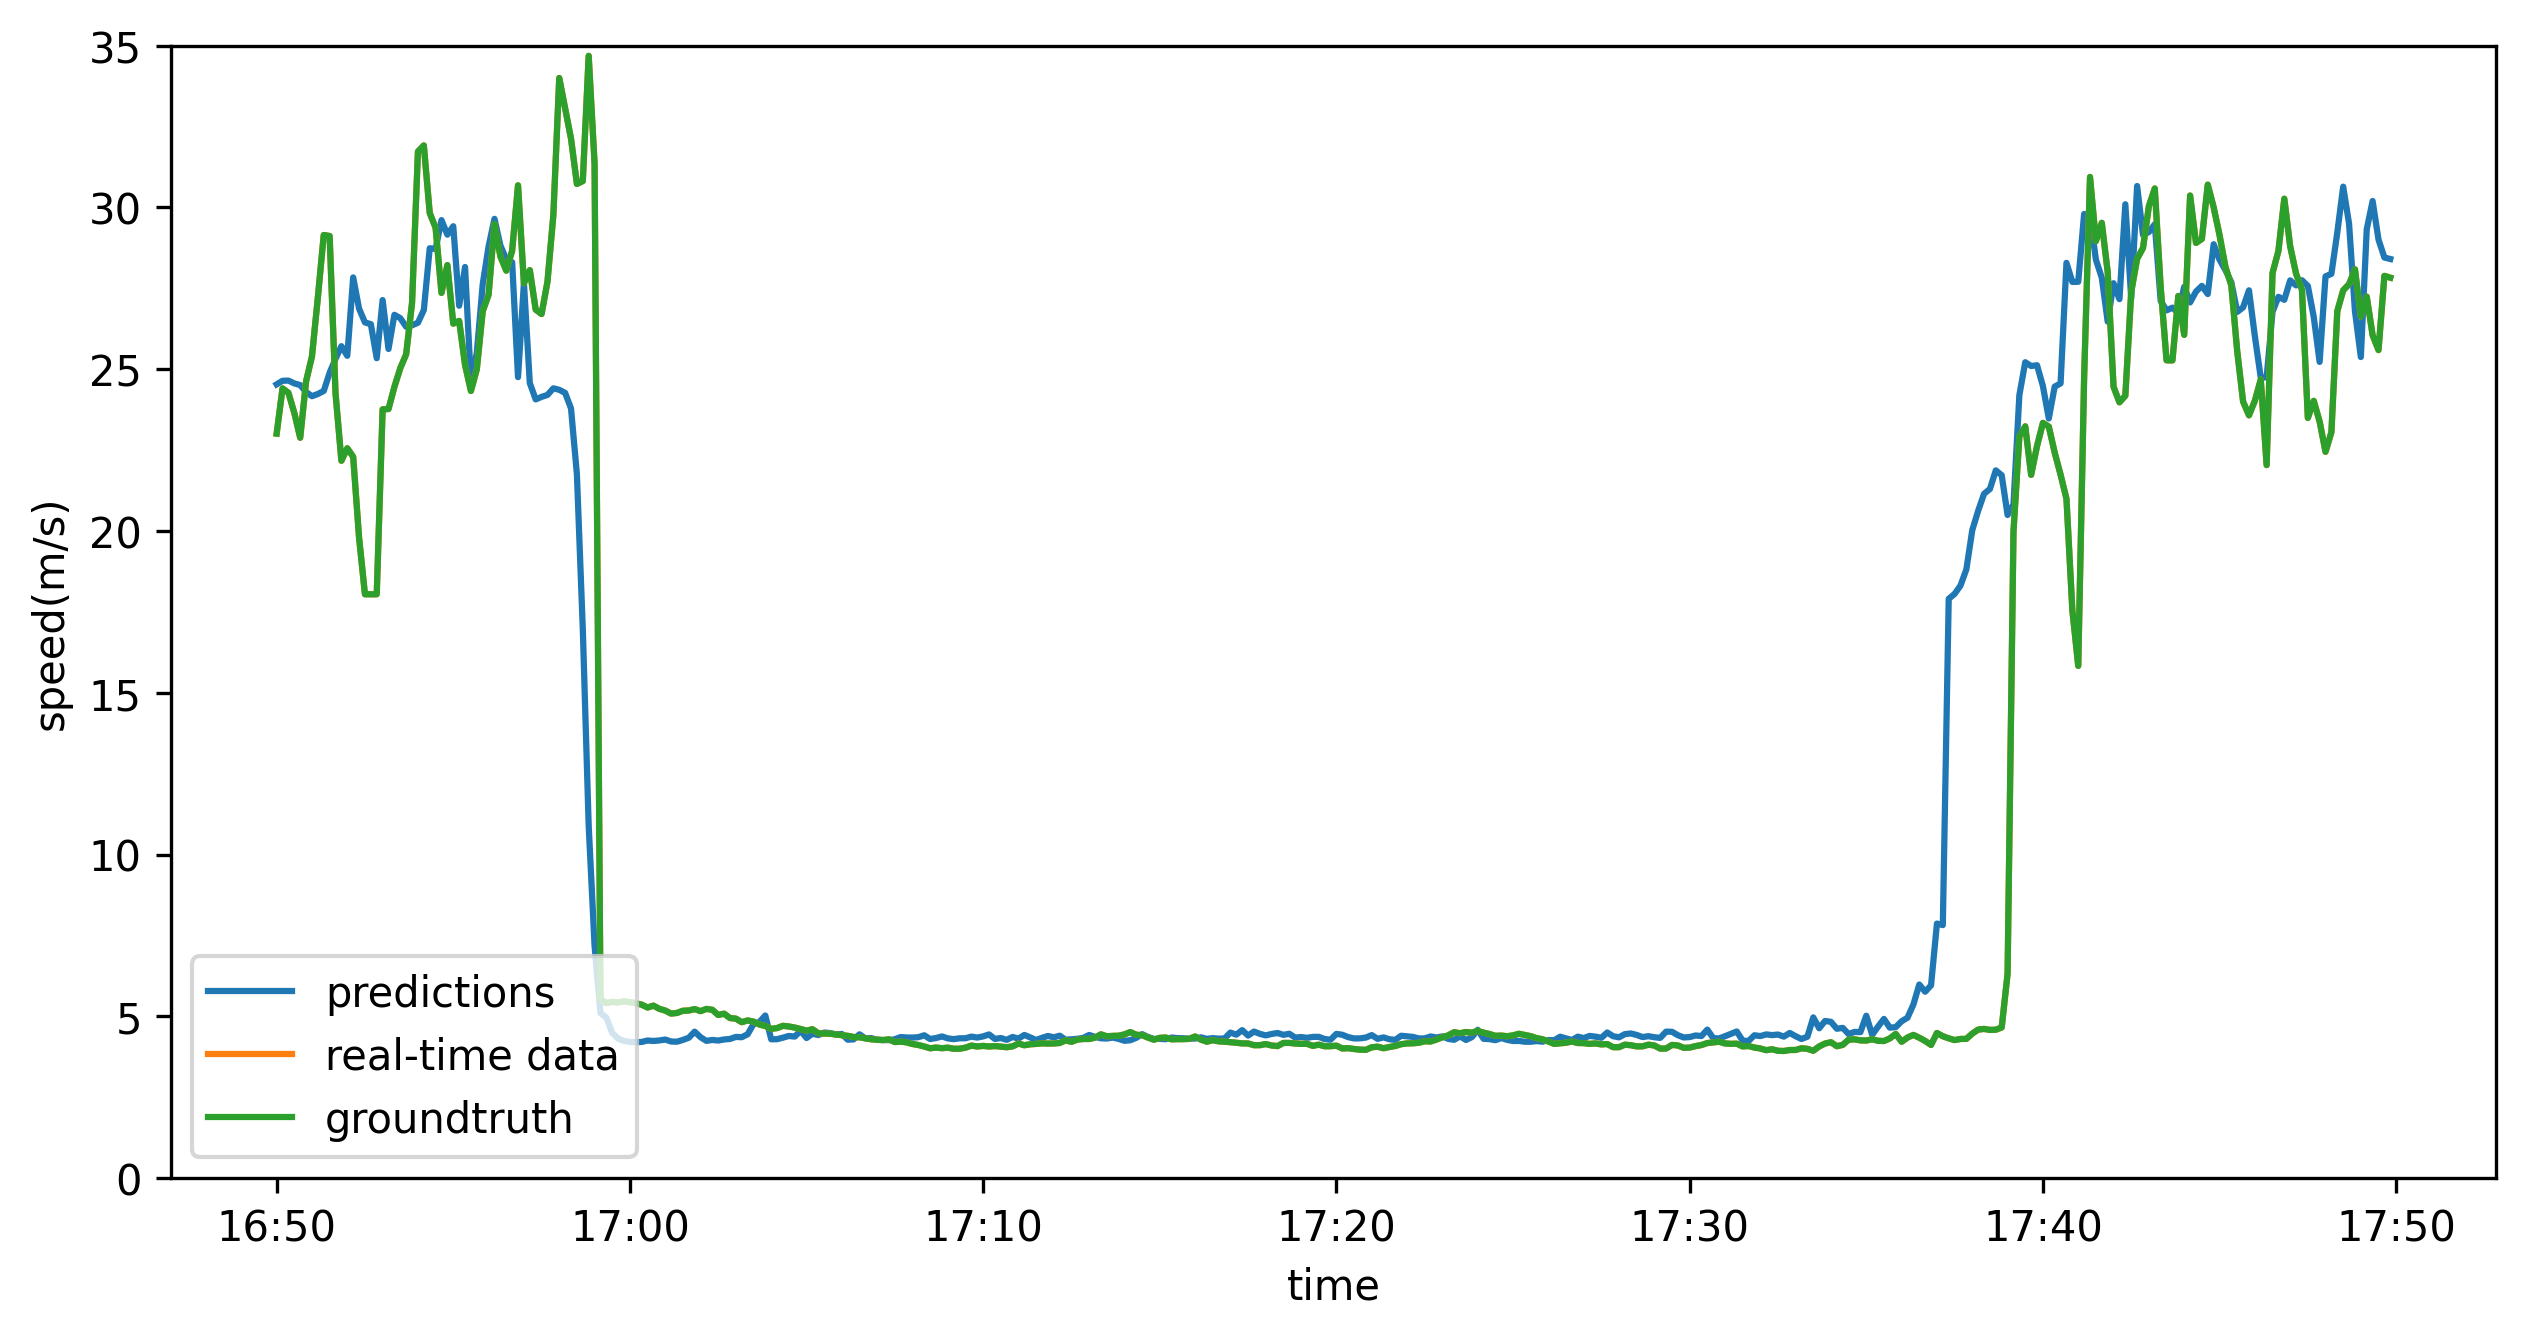

In [ ]:
xs1 = []  #自定义的横坐标
for i in ['12:40','12:50','13:00','13:10','13:20','13:30','13:40','13:50']:
    xs1.append(i)
scale = np.arange(len(xs1)) 
xs2 = []  #自定义的横坐标
for i in ['14:40','14:50','15:00','15:10','15:20','15:30','15:40','15:50']:
    xs2.append(i)
scale = np.arange(len(xs2)) 
xs3 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50']:
    xs3.append(i)
scale = np.arange(len(xs3)) 

# figure
import matplotlib.pyplot as plt
# 1点cover事故
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][0,1020:1380,151]) # 12:50-13:50
plt.plot(a[151][1][1020:1380])
plt.plot(b[151][1][1020:1380])
plt.ylim(0,35)
plt.legend(labels=["predictions","real-time data","groundtruth"],loc="lower left")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.show()
#plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/98.jpg', dpi=300)

# figure
import matplotlib.pyplot as plt
# 3点中途cover事故
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale,xs2)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][0,2460:2820,148]) # 16:50-17:50
plt.plot(a[148][1][2460:2820])
plt.plot(b[148][1][2460:2820])
plt.ylim(0,35)
plt.legend(labels=["predictions","real-time data","groundtruth"],loc="lower left")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.show()
#plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/98.jpg', dpi=300)

# figure
import matplotlib.pyplot as plt
# 5点事故无cover
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale,xs3)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][0,2460:2820,46]) # 16:50-17:50
plt.plot(a[46][1][2460:2820])
plt.plot(b[46][1][2460:2820])
plt.ylim(0,35)
plt.legend(labels=["predictions","real-time data","groundtruth"],loc="lower left")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.show()
#plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/98.jpg', dpi=300)

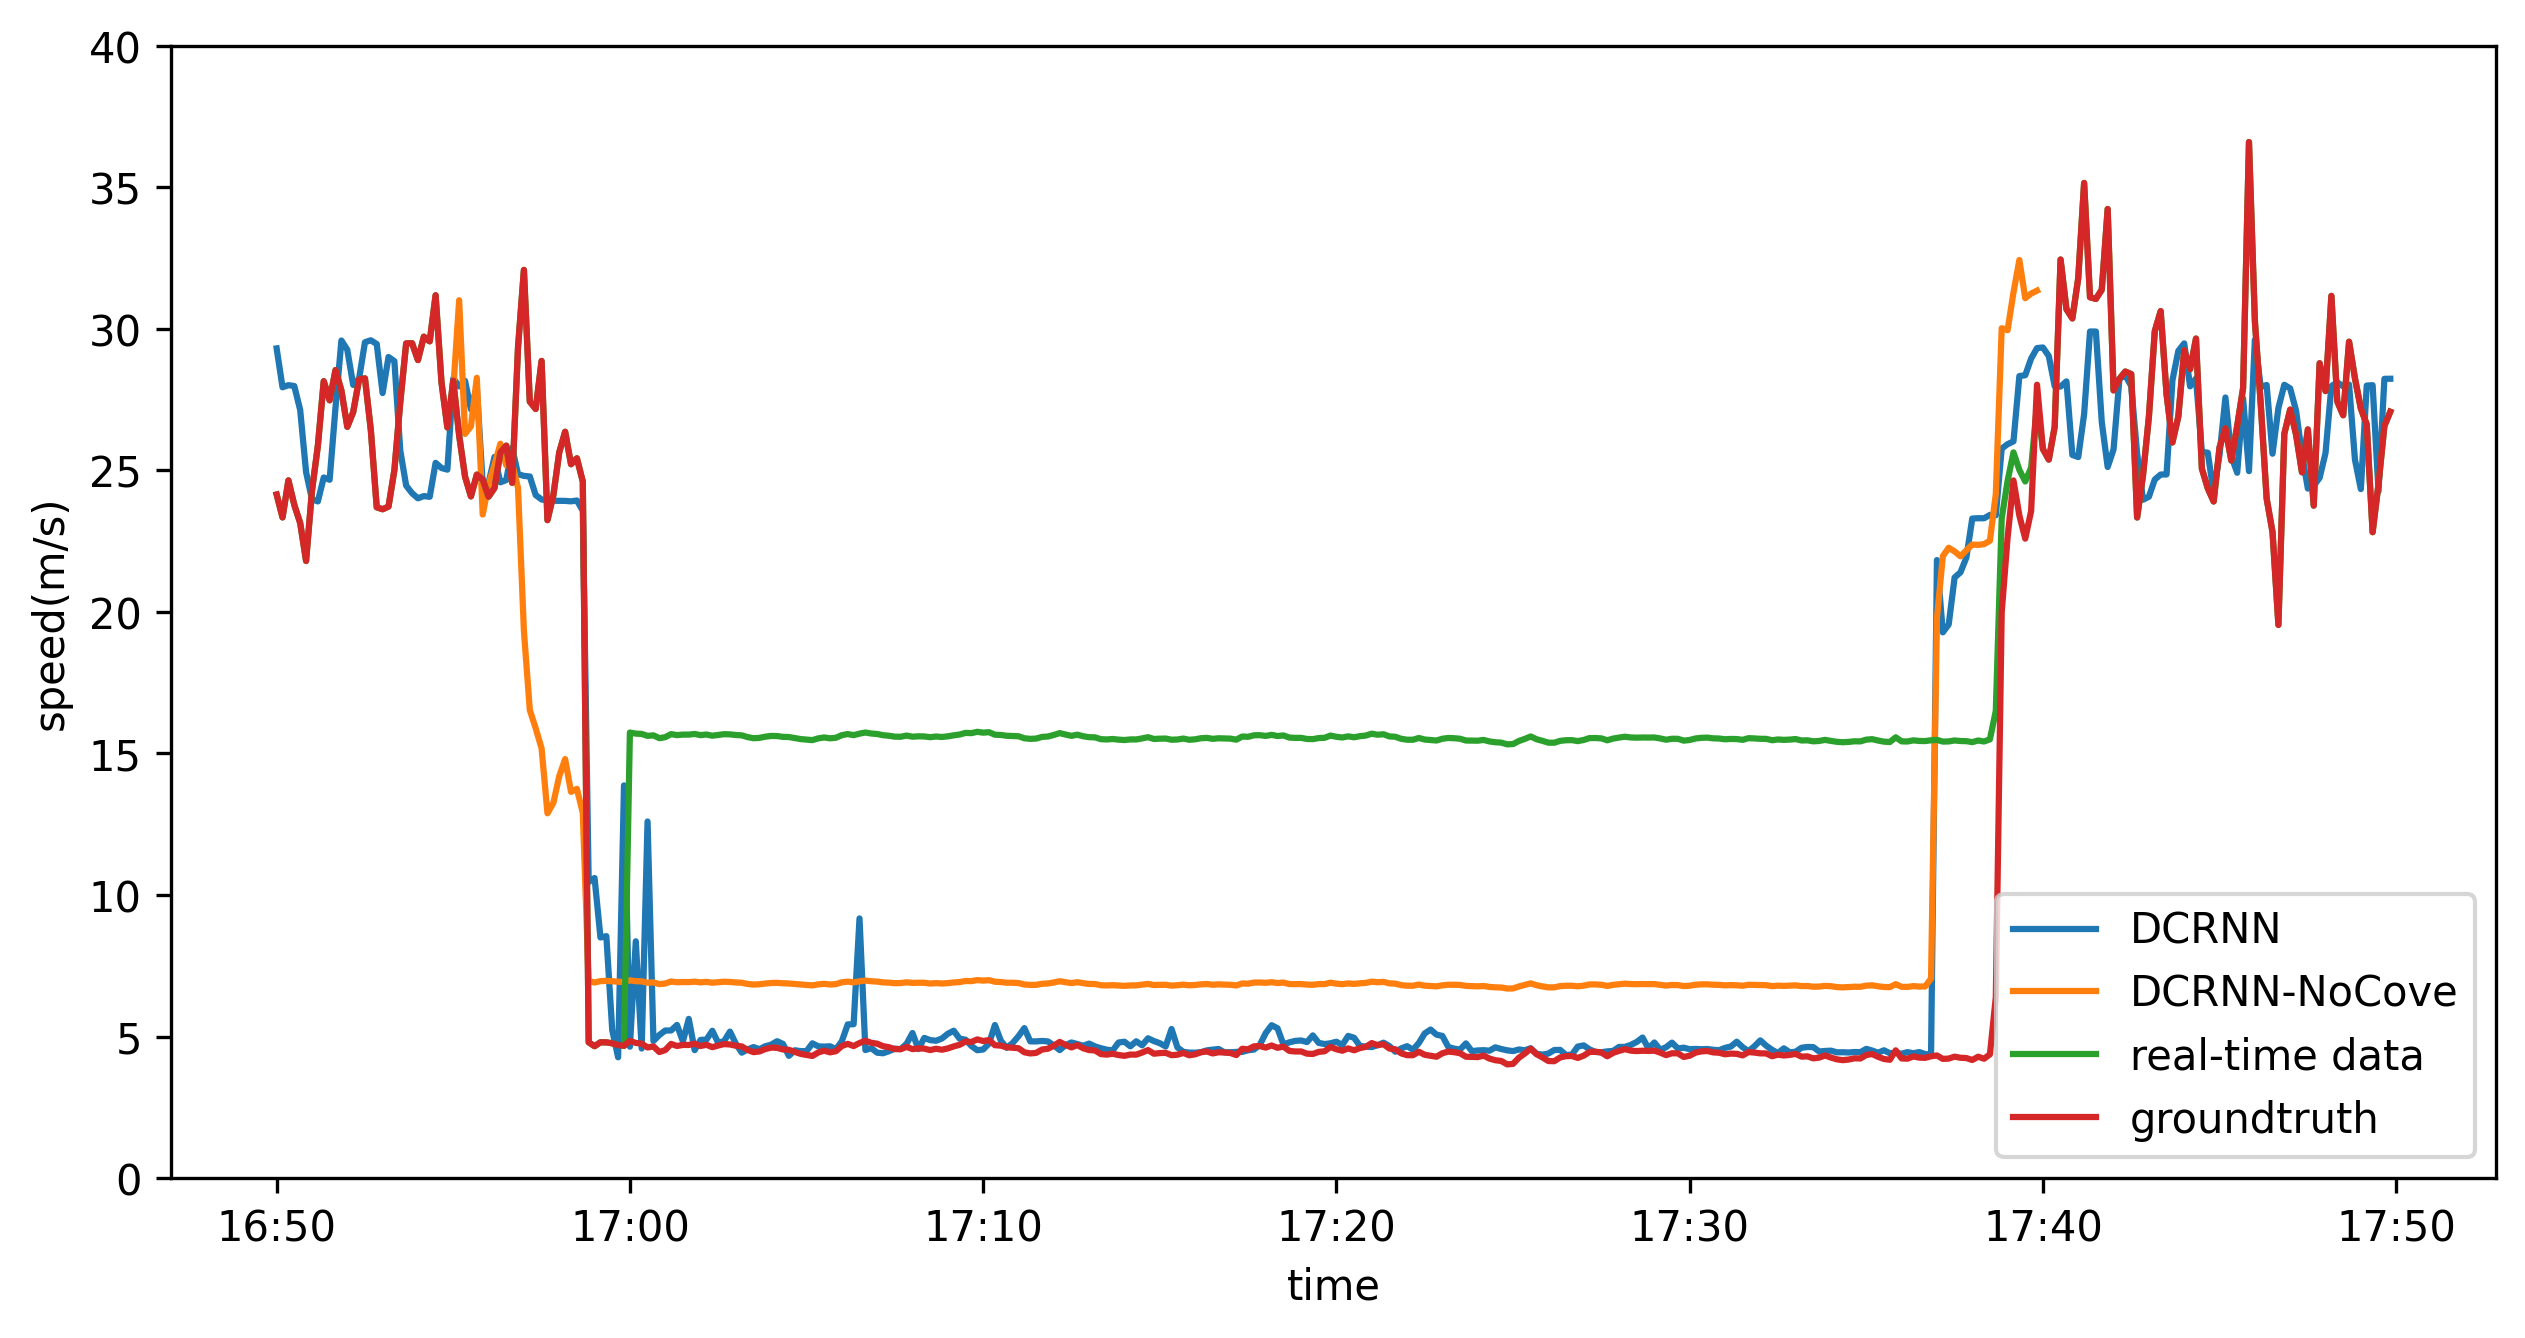

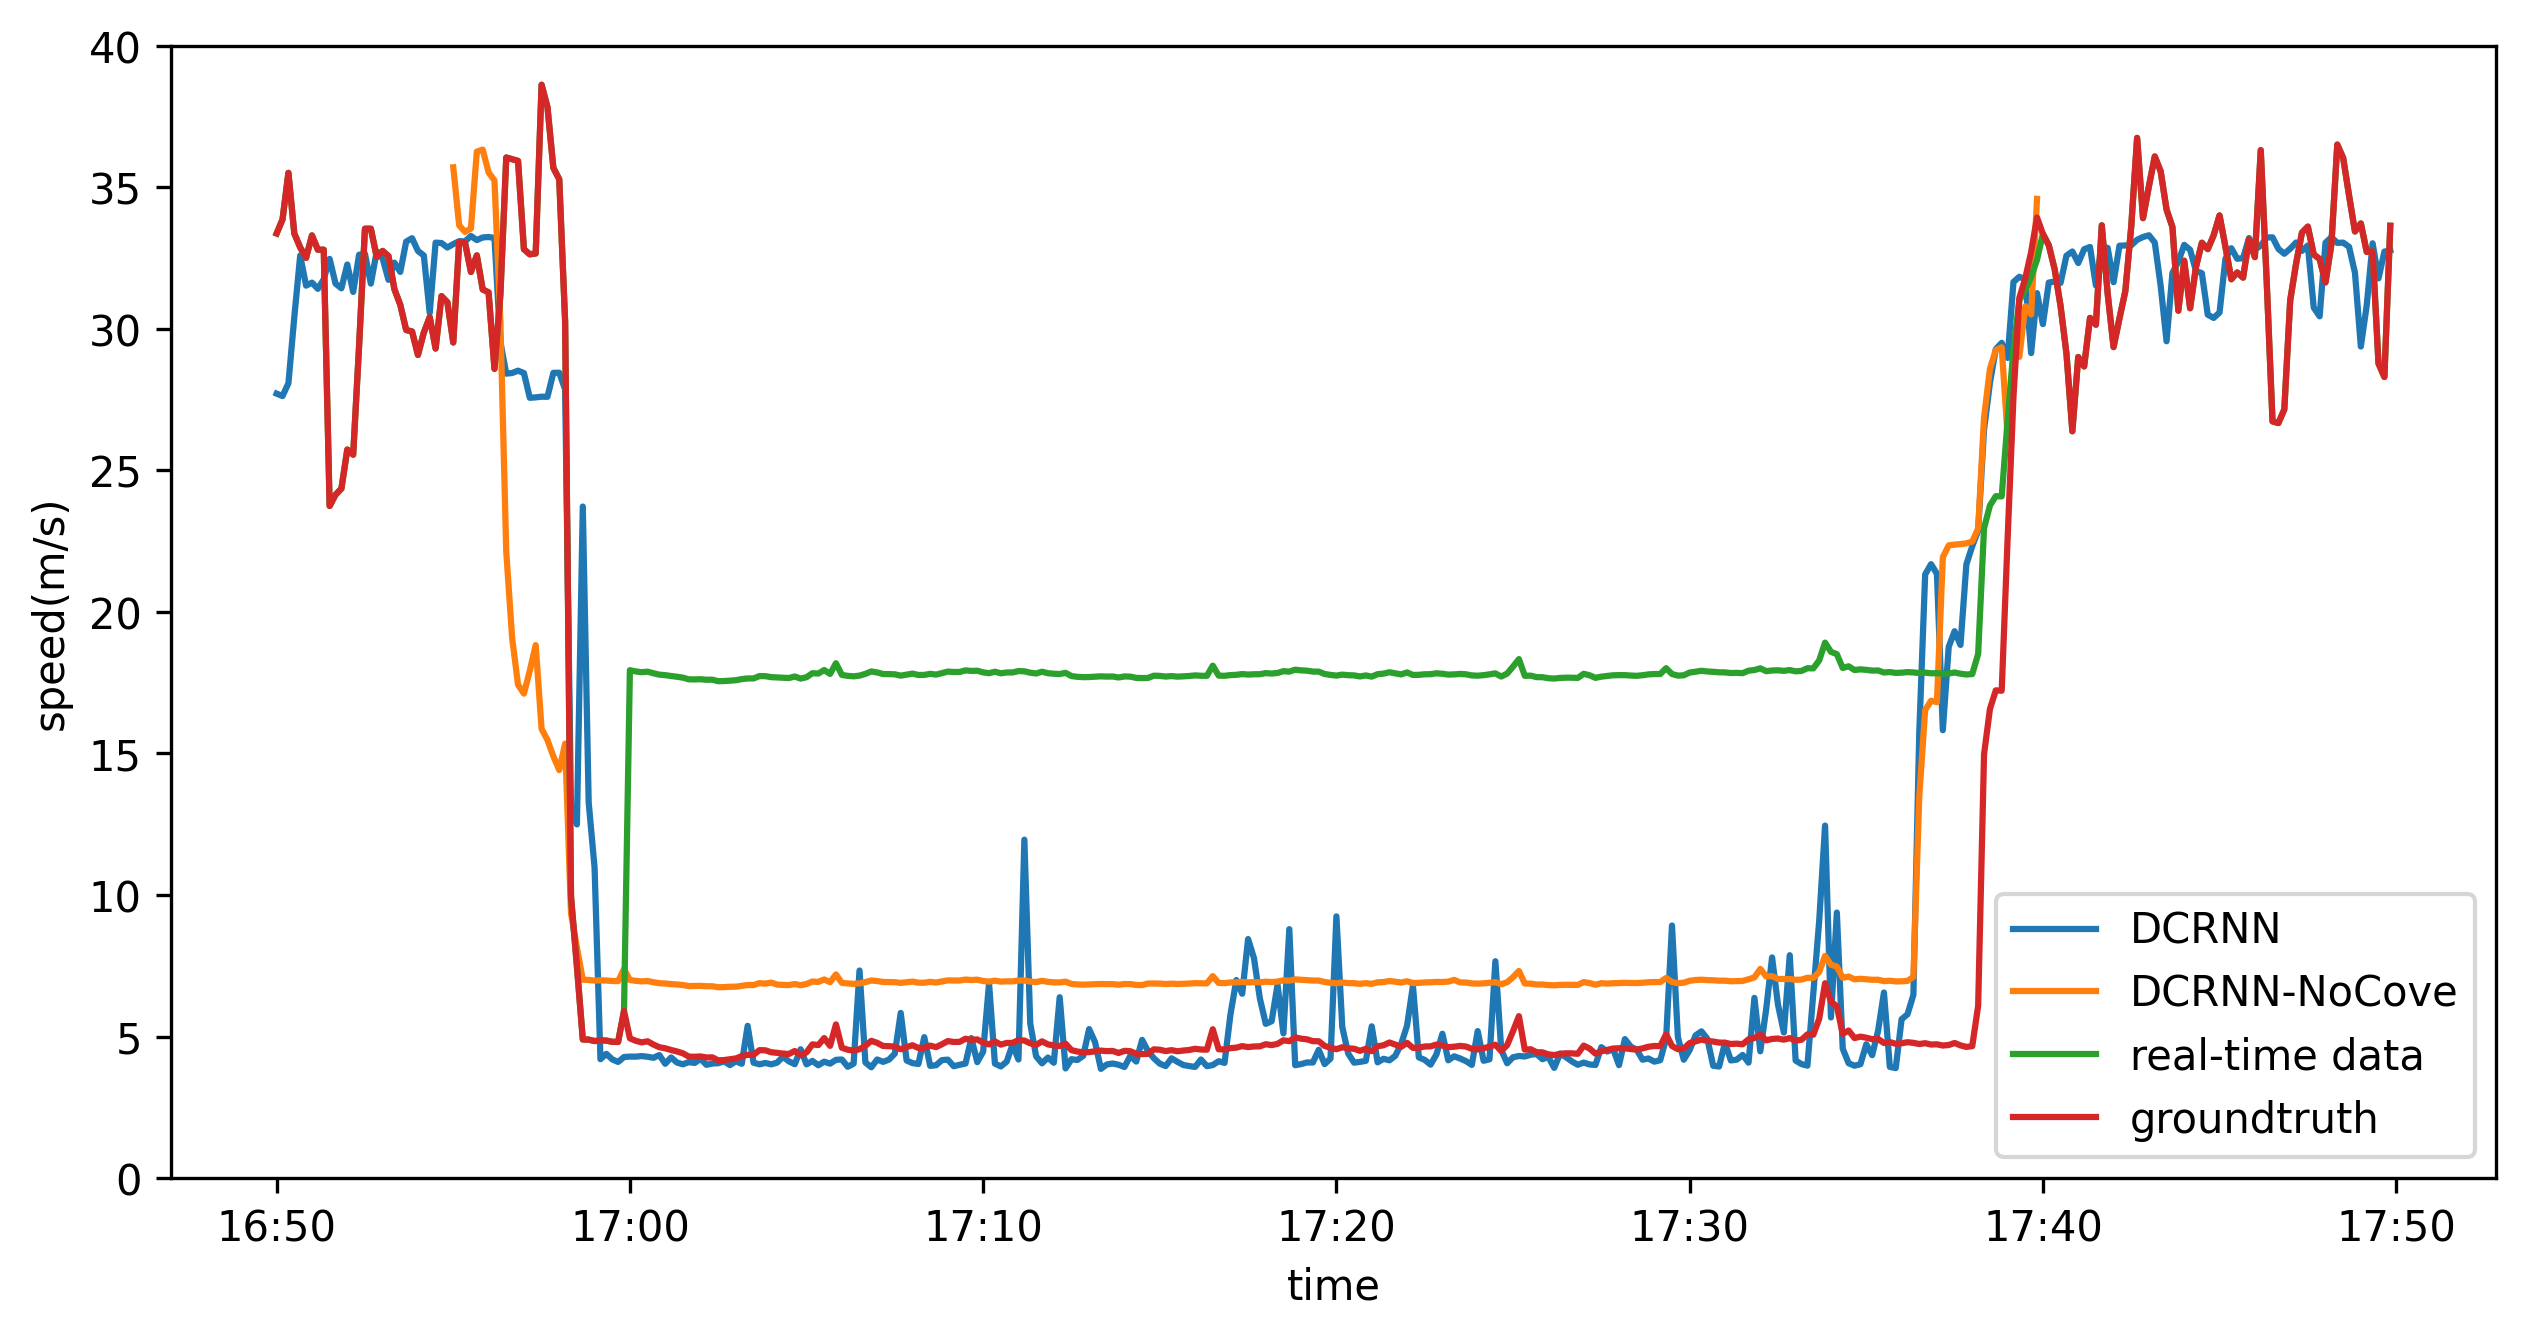

In [ ]:
# 画图 M
import matplotlib.pyplot as plt

#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_50.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_50.npy', allow_pickle=True)
#b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

non = [None]*30

xs1 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
 

# figure
# single node mask from beginning, 17：00-17：40
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,2460:2820,148])
plt.plot(non+list(result1['predictions'][1,:,148]))
plt.plot(a[148][1][2460:2820])
plt.plot(b[148][1][2460:2820])
plt.ylim(0,40)
plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/single_mask_'+exp+'.png', dpi=300)
plt.show()



# multiple node mask from beginning, 17：00-17：40
plt.figure(2,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,2460:2820,44])
plt.plot(non+list(result1['predictions'][1,:,44]))
plt.plot(a[44][1][2460:2820])
plt.plot(b[44][1][2460:2820])
plt.ylim(0,40)
plt.legend(labels=["DCRNN","DCRNN-NoCove","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/multiple_mask_'+exp+'.png', dpi=300)

plt.show()

In [ ]:
print(len(rawdata['62830645#2.0.0_0%1']['Original'][0:90]))
print(len(rawdata['62830645#2.0.0_0%1']['Attacker']))
print(len(result['predictions'][0,2760:2850,44]))
print(rawdata['238459506.6_0%1']['Original'][0:2])
print(rawdata['238459506.6_0%1']['Attacker'][0:2])

90
241
90
[[(26.39, '58801-CLONEC1-0-1-CLONEC1-i1-CLONEC1'), (25.323446668177734, '59744-i1-CLONEC1'), (24.90059999899337, '43593-CLONEC1-1-CLONEC1-i2')], [(4.67, '58453-CLONEC1-0-CLONEC1-1-i1-CLONEC1'), (5.53, '59741-i1'), (25.123202004944254, '59744-i1-CLONEC1'), (25.219883291503994, '58801-CLONEC1-0-0-CLONEC1-i1-CLONEC1'), (25.168022136361596, '58453-CLONEC1-0-CLONEC1-1-i1-CLONEC1')]]
[('59744-i1-CLONEC1', '43593-CLONEC1-1-CLONEC1-i2'), ('59744-i1-CLONEC1', '58801-CLONEC1-0-0-CLONEC1-i1-CLONEC1', '58453-CLONEC1-0-CLONEC1-1-i1-CLONEC1')]


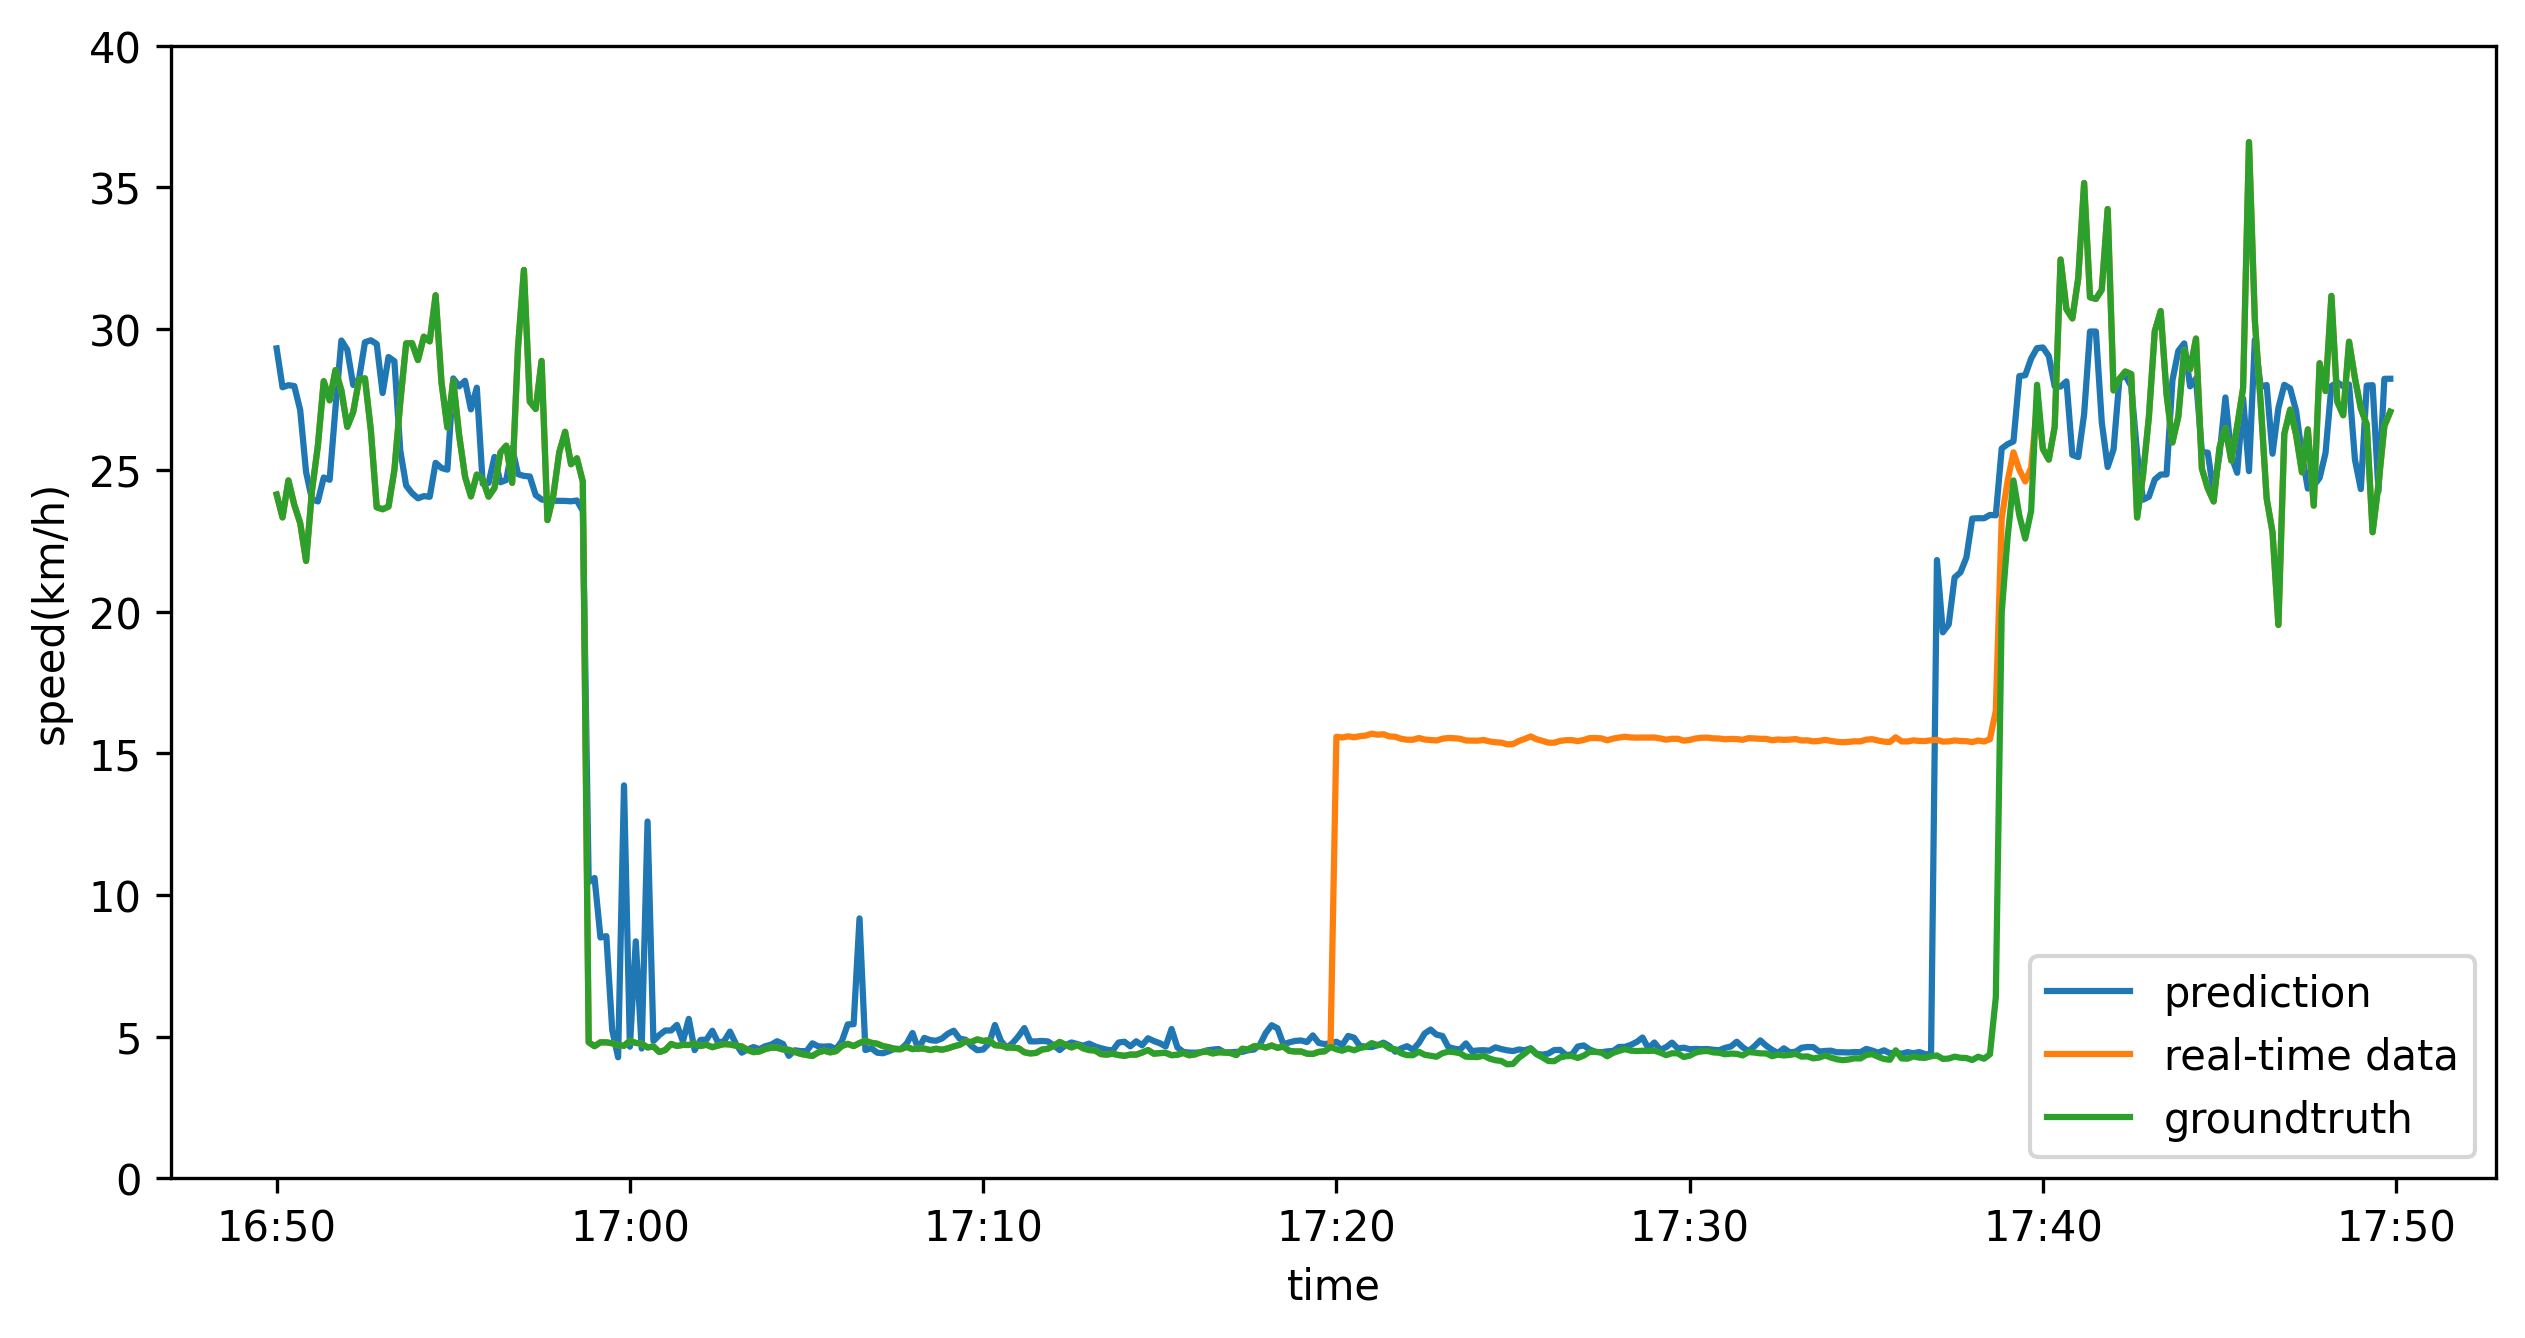

In [ ]:
# 画图 M
import matplotlib.pyplot as plt

#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_50.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_50.npy', allow_pickle=True)
#b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

non = [None]*30

xs1 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
 

# figure
# single node mask from beginning, 17：00-17：40
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,2460:2820,148])
plt.plot(a[148][1][2460:2820])
plt.plot(b[148][1][2460:2820])
plt.ylim(0,40)
plt.legend(labels=["prediction","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(km/h)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/mid_mask_'+exp+'.png', dpi=300)
plt.show()


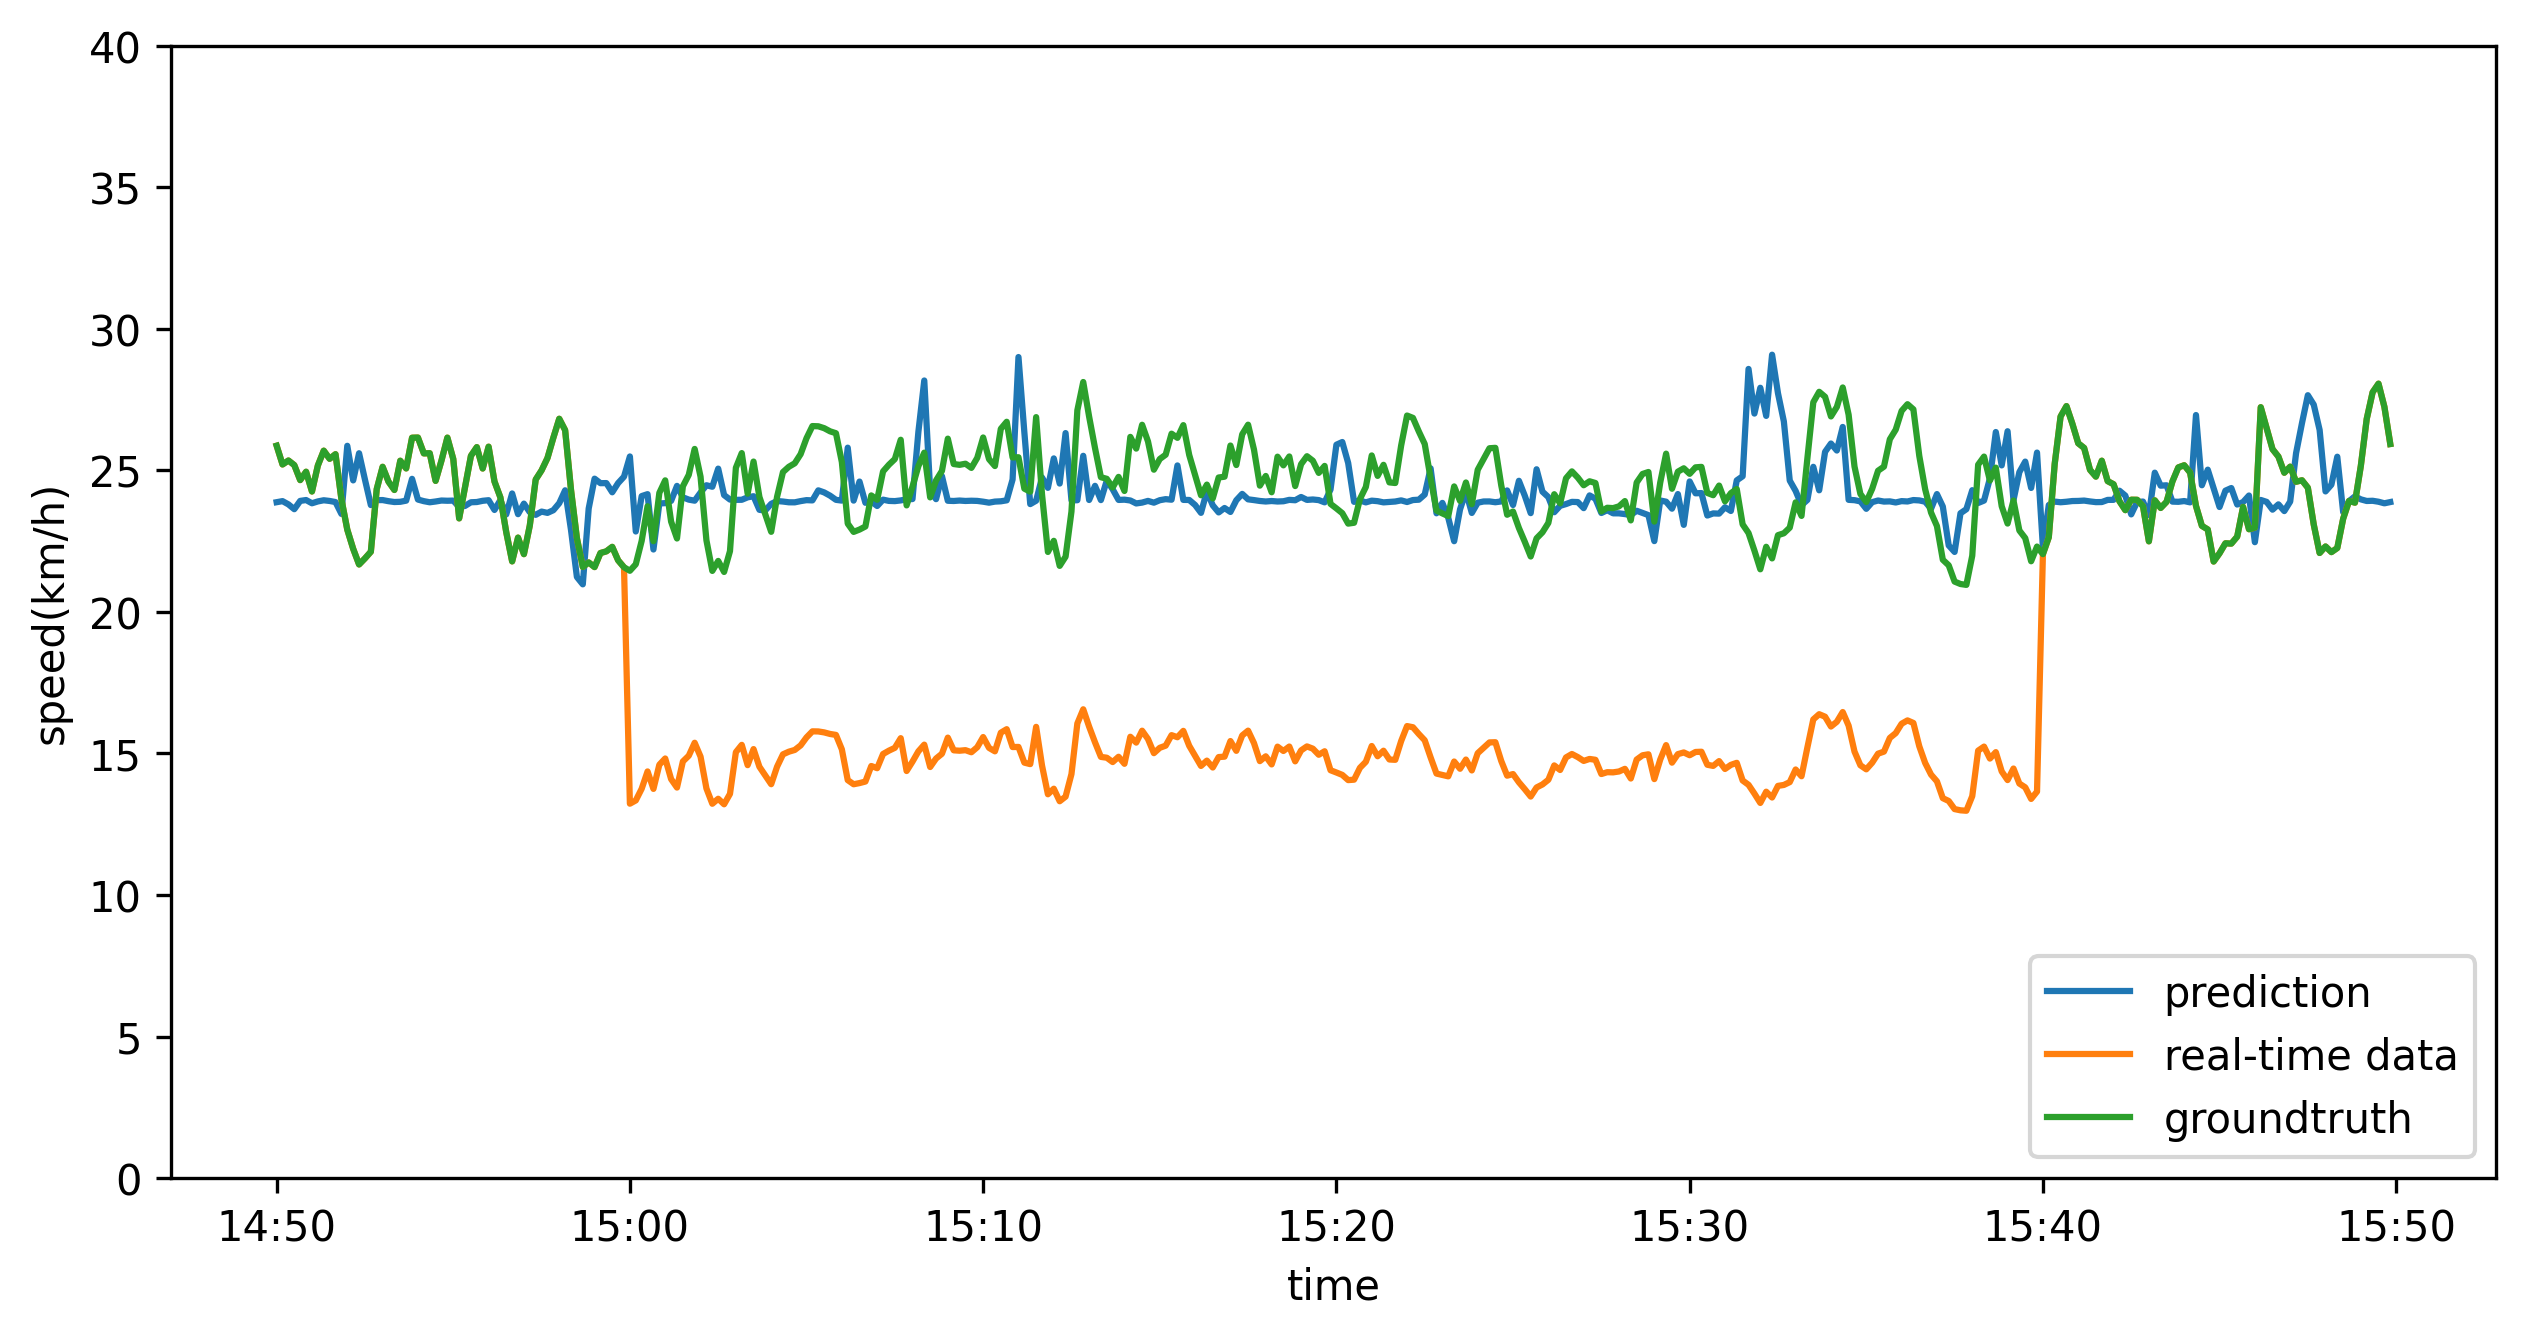

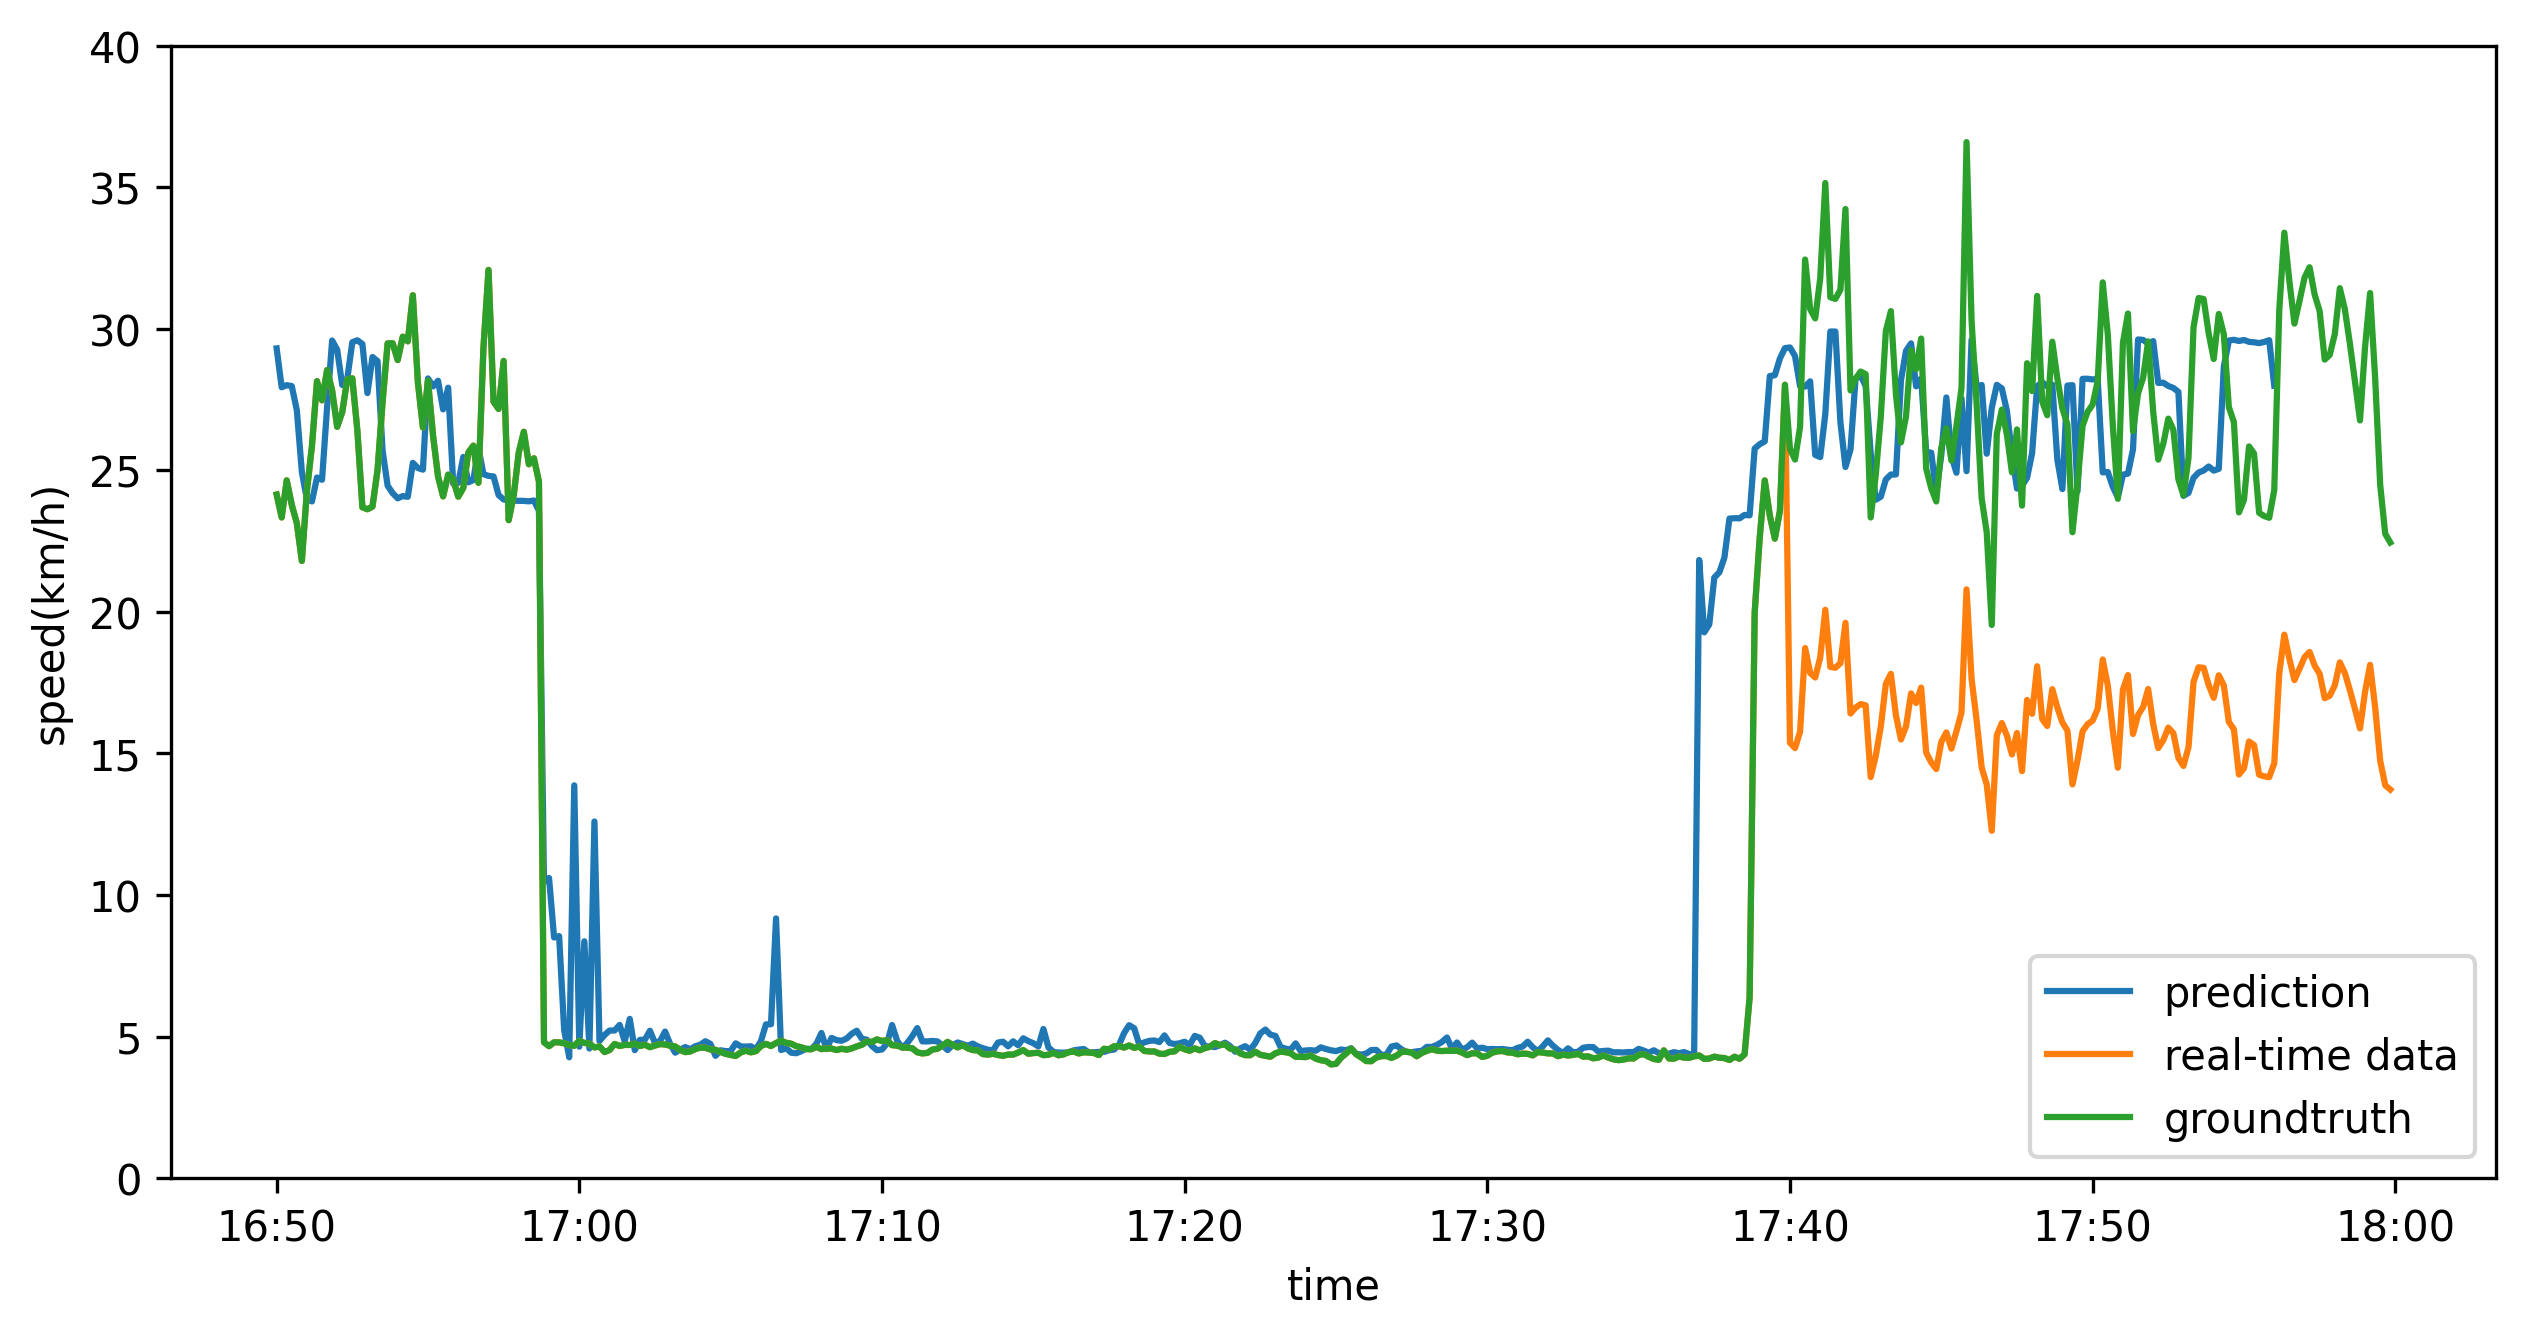

In [ ]:
# 画图
import matplotlib.pyplot as plt

#result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_50.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_50.npy', allow_pickle=True)
#b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

non = [None]*30

xs1 = []  #自定义的横坐标
for i in ['14:40','14:50','15:00','15:10','15:20','15:30','15:40','15:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
xs2 = []  #自定义的横坐标
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50','18:00','18:10']:
    xs2.append(i)
scale2 = np.arange(len(xs2)) 
 

# figure
# single node fake, 15：00-15：40
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale1,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,1740:2100,98])
#plt.plot(non+list(result1['predictions'][1,:,98]))
plt.plot(a[98][1][1740:2100])
plt.plot(b[98][1][1740:2100])
plt.ylim(0,40)
plt.legend(labels=["prediction","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(km/h)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/fake_'+exp+'.png', dpi=300)
plt.show()


# single node extension, 17：40-18：00
plt.figure(3,figsize=(10, 5), dpi=300) 
plt.xticks(scale2,xs2)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][1,2460:2940,148])
#plt.plot(non+list(result1['predictions'][1,:,148]))
plt.plot(a[148][1][2460:2940])
plt.plot(b[148][1][2460:2940])
plt.ylim(0,40)
plt.legend(labels=["prediction","real-time data","groundtruth"],loc="lower right")
plt.xlabel('time')
plt.ylabel('speed(km/h)')
plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/0913/prolong_'+exp+'.png', dpi=300)
plt.show()

In [ ]:
dataset = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn_predictions.npz', allow_pickle=True)
print(dataset.files)  #['predictions', 'groundtruth']
#val = np.load('/content/drive/MyDrive/MSc/dcrnn/data/10s_fill/test.npz', allow_pickle=True)
#print(val.files) #['x', 'y', 'x_offsets', 'y_offsets']

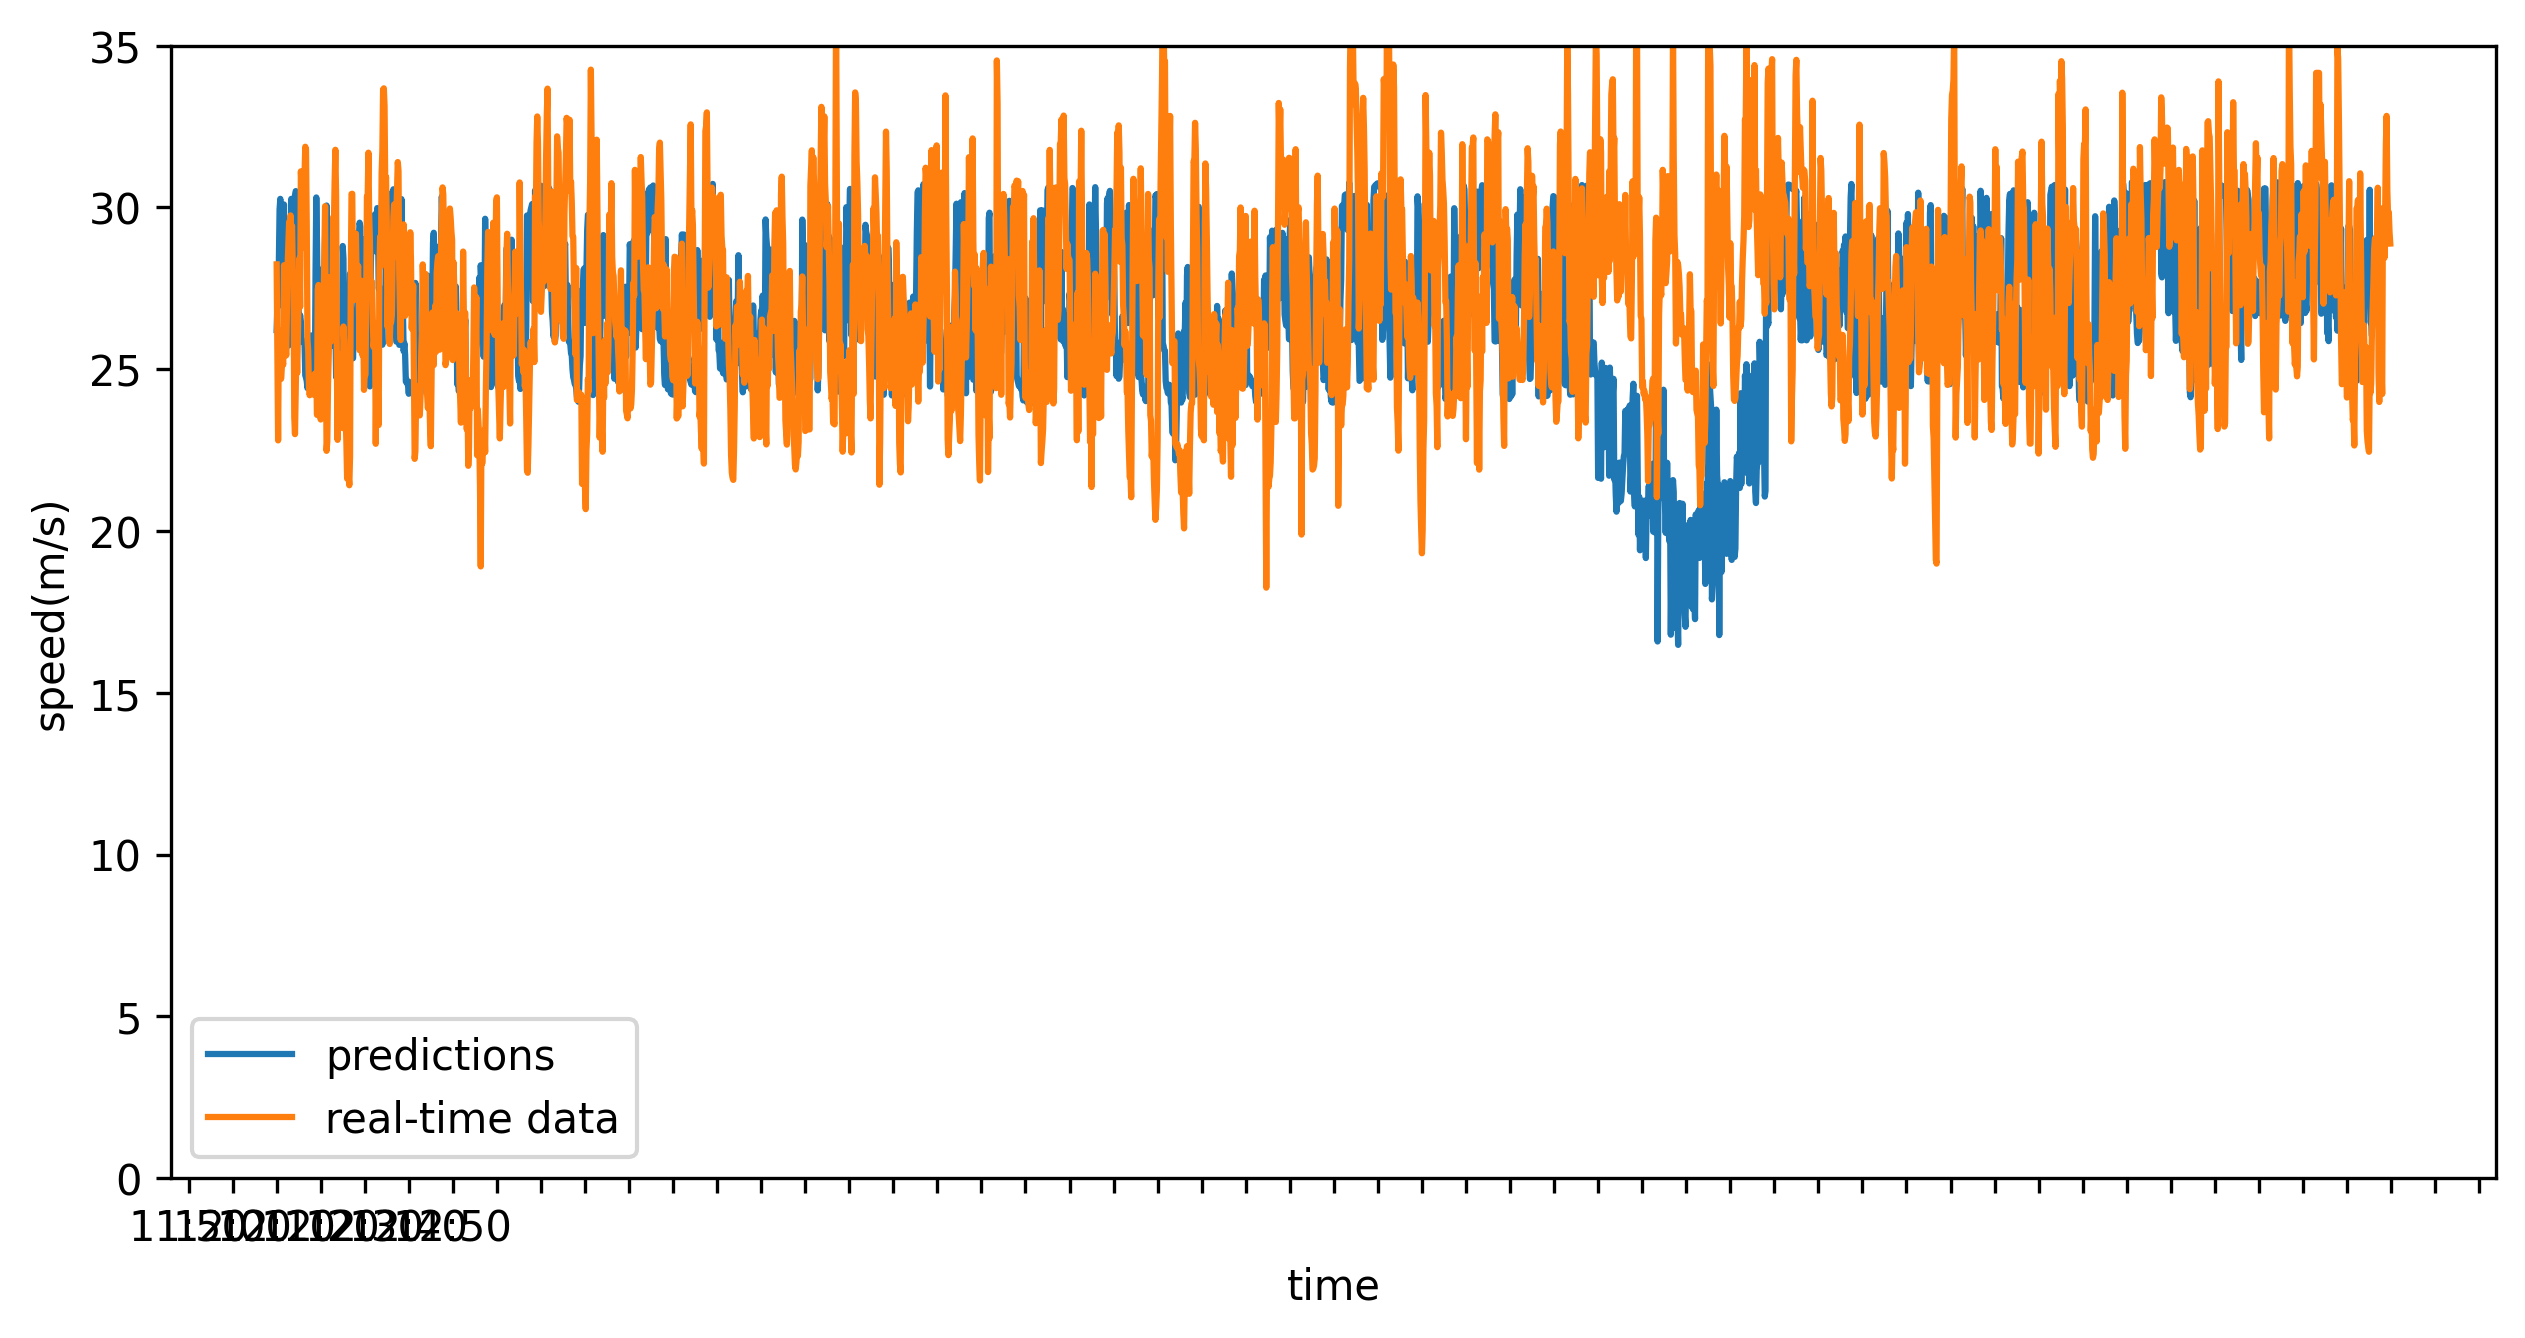

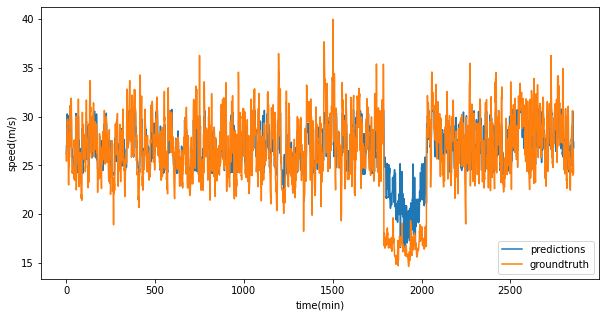

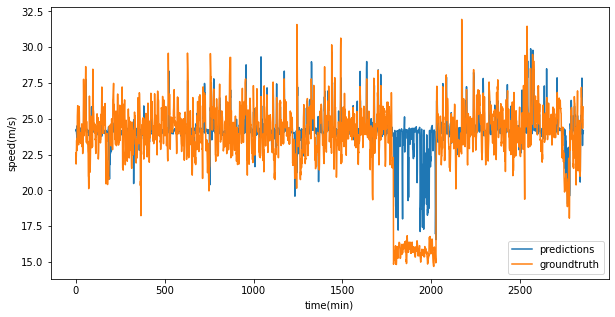

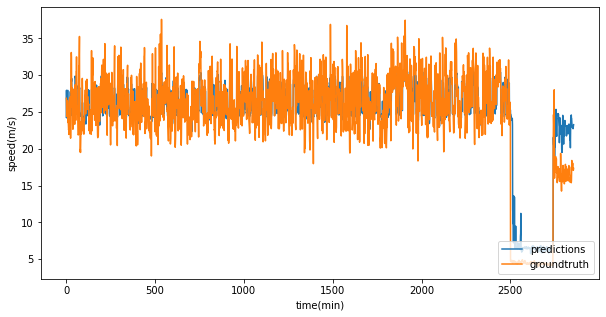

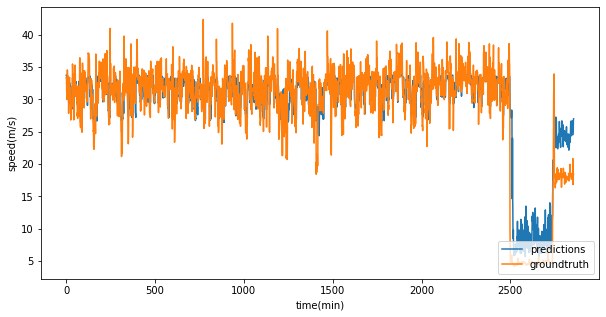

In [ ]:
result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/FE_70.npz', allow_pickle=True)
#a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_70.npy', allow_pickle=True)
b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True)

xs1 = []  #自定义的横坐标
for i in ['11:40','11:50','12:00','12:10','12:20','12:30','12:40','12:50']:
    xs1.append(i)
scale = np.arange(len(xs1)) 
xs2 = []  #自定义的横坐标
for i in ['13:40','13:50','14:00','14:10','14:20','14:30','14:40','14:50']:
    xs2.append(i)
scale = np.arange(len(xs2)) 
xs3 = []  #自定义的横坐标
for i in ['14:40','14:50','15:00','15:10','15:20','15:30','15:40','15:50']:
    xs3.append(i)
scale = np.arange(len(xs3)) 

# figure
import matplotlib.pyplot as plt
# 12点假事故
plt.figure(1,figsize=(10, 5), dpi=300) 
plt.xticks(scale,xs1)   #自己定义横坐标
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60)) 
plt.plot(result['predictions'][0,:,117])
#plt.plot(a[117][1][1800:2040])
plt.plot(b[117][1])
plt.ylim(0,35)
plt.legend(labels=["predictions","real-time data","groundtruth"],loc="lower left")
plt.xlabel('time')
plt.ylabel('speed(m/s)')
plt.show()
#plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/98.jpg', dpi=300)

# figure
import matplotlib.pyplot as plt
plt.figure(1,figsize=(10, 5)) 
plt.plot(result['predictions'][0,:,117])
plt.plot(result['groundtruth'][0,:,117])
plt.legend(labels=["predictions","groundtruth"],loc="lower right")
#plt.title('Entrance section')
plt.xlabel('time(min)')
plt.ylabel('speed(m/s)')
plt.show()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(10, 5)) 
plt.plot(result['predictions'][0,:,98])
plt.plot(result['groundtruth'][0,:,98])
plt.legend(labels=["predictions","groundtruth"],loc="lower right")
#plt.title('Entrance section')
plt.xlabel('time(min)')
plt.ylabel('speed(m/s)')
plt.show()

# figure
import matplotlib.pyplot as plt
plt.figure(1,figsize=(10, 5)) 
plt.plot(result['predictions'][0,:,148])
plt.plot(result['groundtruth'][0,:,148])
plt.legend(labels=["predictions","groundtruth"],loc="lower right")
#plt.title('Entrance section')
plt.xlabel('time(min)')
plt.ylabel('speed(m/s)')
plt.show()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(10, 5)) 
plt.plot(result['predictions'][0,:,44])
plt.plot(result['groundtruth'][0,:,44])
plt.legend(labels=["predictions","groundtruth"],loc="lower right")
#plt.title('Entrance section')
plt.xlabel('time(min)')
plt.ylabel('speed(m/s)')
plt.show()

In [ ]:
dataset = result
print(dataset['predictions'].shape)
print(dataset['groundtruth'].shape)
print(len(dataset['predictions'][0,:,52]))
print(dataset['groundtruth'][0][137,138][52])

(12, 574, 630)
(12, 574, 630)
574


IndexError: ignored

In [ ]:
print(lane_list[24:29])

['238559101#1.0.0_0%0' '238559101#1.0.0_1%0' '62830645#1.275.0.48.421_0%0'
 '43734919#1.608_1%0' '139457434#2.132_0%0']
